**NAME :- KONKAL KAILASH VENKATESH**

**BATCH NO :- DS2312**

**PROJECT :- TEMPERATURE FORECAST**

In [1]:
# import neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings # filter warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv")
data.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [3]:
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])

No. of rows 7752
No. of columns 25


In [4]:
#sort columns by datatypes

data.columns.to_series().groupby(data.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], object: ['Date']}

From the above observation, we can see that

* All the variables are numberical in nature.
* Next_Tmax and Next_Tmin are target variables in our dataset.
* The datasets contains 7752 rows and 25 columns.

# Statistical Analysis

#### Data Integrity Check

In [5]:
data.duplicated().sum()

0

#### Let's check any white space, 'NA' or '-' exist in dataset.

In [6]:
data.isin([' ','NA','-']).sum().any()

False

From the above observation, we can say that

* There are no duplicate entry present in the dataset.
* Also there are no Whitespace, NA, '-' present in the dataset.

# Missing Value Check


In [7]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                  Missing_values  %Missing values
LDAPS_CC3                     75         0.967492
LDAPS_PPT4                    75         0.967492
LDAPS_PPT2                    75         0.967492
LDAPS_PPT1                    75         0.967492
LDAPS_CC4                     75         0.967492
LDAPS_CC2                     75         0.967492
LDAPS_CC1                     75         0.967492
LDAPS_LH                      75         0.967492
LDAPS_WS                      75         0.967492
LDAPS_Tmin_lapse              75         0.967492
LDAPS_Tmax_lapse              75         0.967492
LDAPS_RHmax                   75         0.967492
LDAPS_RHmin                   75         0.967492
LDAPS_PPT3                    75         0.967492
Present_Tmin                  70         0.902993
Present_Tmax                  70         0.902993
Next_Tmax                     27         0.348297
Next_Tmin                     27         0.348297
Date                           2         0.025800


As missing value presents are less than 1%. So we can directly drop these missing values.

In [8]:
print('We had {} Rows and {} Columns before droping values'.format(data.shape[0], data.shape[1]))
data.dropna(inplace=True)
print('We had {} Rows and {} Columns after droping values'.format(data.shape[0], data.shape[1]))

We had 7752 Rows and 25 Columns before droping values
We had 7588 Rows and 25 Columns after droping values


#### Now, No missing values is present

In [9]:
# converting data datatypes and spliting date into date,month,year

data['Date']=pd.to_datetime(data['Date'])
data['Day']=data['Date'].apply(lambda x:x.day)
data['Month']=data['Date'].apply(lambda x:x.month)
data['Year']=data['Date'].apply(lambda x:x.year)
data.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013  

[5 rows x 28 columns]

Now to gain more insights in data, we will create additional columns with locations of station in terms of city and respective state.

In [10]:
!pip install reverse_geocoder

     ---------------------------------------- 2.2/2.2 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268077 sha256=4ae5cd38e1bdb43482db0187c221fedae140bd11595a8cd5c93fd5eff788039f
  Stored in directory: c:\users\shailesh\appdata\local\pip\cache\wheels\1c\07\35\8bc99c070537c835a0696e47609f6270f174cb70b86b65c7d8
Successfully built reverse_geocoder


In [11]:
# import Reverse geocoder

import reverse_geocoder as rg
import pprint

In [12]:
geodata =[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list (zip(data['lat'],data['lon']))
    a = reverse_geocoordinates(coordinates)
    geodata.append(a)
#creating dataframe for geographical name
geo_names = pd.DataFrame(geodata).transpose()

Loading formatted geocoded file...


We have gather state and city name as per corresponding to it's latitude and longitude available. Now it is time incorporate state and city columns in our datasets.

In [13]:
data['State']= geo_names[0].apply(lambda x:x.get('admin1'))
data['City']= geo_names[0].apply(lambda x:x.get('name'))

In [14]:
data.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...       DEM  \
0         28.074101         23.006936  6.818887   69.451805  ...  212.3350   
1         29.850689         24.035009  5.691890   51.937448  ...   44.7624   
2         30.091292         24.565633  6.138224   20.573050  ...   33.3068   
3         29.704629         23.326177  5.650050   65.727144  ...   45.7160   
4         29.113934         23.486480  5.735004  107.965535  ...   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  \
0  2.7850      5992.895996       29.1       21.2   30      6  2013   
1  0.5141      5869.312500       30.5       22.5   30      6  2013   
2  0.2661      5863.555664       31.1       23.9   30      6  2013   
3  2.5348      5856.964844       31.7       24.3   30      6  2013   
4  0.5055      5859.552246       31.2       22.5   30      6  2013   

         State     City  
0        Seoul    Seoul  
1        Seoul    Seoul  
2        Seoul    Seoul  
3        Seoul    Seoul  
4  Gyeonggi-do  Guri-si  

[5 rows x 30 columns]

In [15]:
data.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat         lon          DEM        Slope  \
count  7588.000000  ...  7588.000000  7588.00000  7588.000000  7588.000000   
mean      0.368510  ...    37.544792   126.99142    61.918136     1.259755   
std       0.262260  ...     0.050428     0.07922    54.323529     1.372748   
min       0.000000  ...    37.456200   126.82600    12.370000     0.098500   
25%       0.146546  ...    37.510200   126.93700    28.700000     0.271300   
50%       0.315706  ...    37.550700   126.99500    45.716000     0.618000   
75%       0.574174  ...    37.577600   127.04200    59.832400     1.767800   
max       0.967277  ...    37.645000   127.13500   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean       5343.724208    30.241526    22.910820    16.337375     7.068134   
std         429.782561     3.111807     2.482256     8.216880     2.242389   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        5001.485717    28.200000    21.300000     8.000000     7.000000   
50%        5441.987305    30.400000    23.100000    16.000000     7.000000   
75%        5729.485840    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              Year  
count  7588.000000  
mean   2014.991697  
std       1.410877  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

# Start Exploring present Temprature

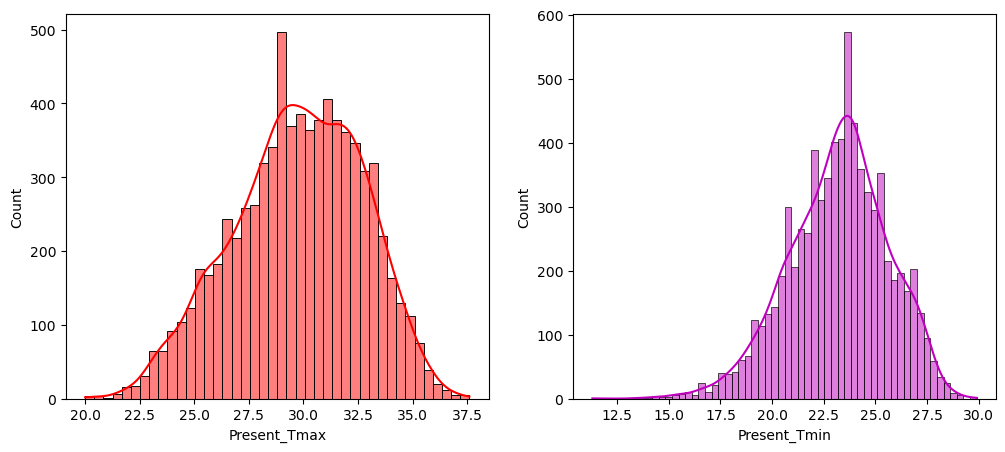

In [16]:
#plotting  histogram for present_Tmax and present_Tmin variables

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(data['Present_Tmin'],kde=True,color='m')
plt.show()

For majority of readings, present tempratures maximum varies in between 27.5 to 32.5 degree.

# Let's find out maximum and minimum temprature over period 

In [17]:
print('present Maximum Temprature Maxima in year 2013-16 :',data.Present_Tmax.max())
print('present Maximum Temprature Minima in year 2013-16 :',data.Present_Tmax.min())
print(' Avereage present Maximum Temprature in year 2013-16 :',data.Present_Tmax.mean())
print('='*100)
print('present Minimum Temprature Maxima in year 2013-16 :',data.Present_Tmin.max())
print('present Minimum Temprature Minima in year 2013-16 :',data.Present_Tmin.min())
print(' Average present Minimum Temprature in year 2013-16 :',data.Present_Tmin.mean())

present Maximum Temprature Maxima in year 2013-16 : 37.6
present Maximum Temprature Minima in year 2013-16 : 20.0
 Avereage present Maximum Temprature in year 2013-16 : 29.748365840801263
present Minimum Temprature Maxima in year 2013-16 : 29.9
present Minimum Temprature Minima in year 2013-16 : 11.3
 Average present Minimum Temprature in year 2013-16 : 23.195809172377437


#### Checking where actually these minima and maxima occur.

In [18]:
pd.set_option('display.max_columns',None)
data.loc[data.Present_Tmax==data.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-11-08          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5717   0.218892   0.094288   0.004283   0.000343         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
5717         0.0         0.0  37.4832  127.024  56.4448  1.2313   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
5717      5082.563477       37.0       27.8    8     11  2016  Gyeonggi-do   

            City  
5717  Bucheon-si

In [19]:
data.loc[data.Present_Tmax==data.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7725   0.046182   0.014955        0.0    0.00063         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
7725         0.0         0.0  37.6046  126.991  212.335  2.785   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year State City  
7725       4614.76123       23.8       15.1   30      8  2017   NaN  NaN

In [20]:
data.loc[data.Present_Tmin==data.Present_Tmin.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-02-08          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2397   0.684685   0.448827   0.762858   0.635728    1.670126    0.005681   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
2397    0.248885    0.003176  37.5372  126.891  15.5876  0.1554   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
2397      5360.226563       31.3       24.8    8      2  2014  Gyeonggi-do   

         City  
2397  Guri-si

In [21]:
data.loc[data.Present_Tmin==data.Present_Tmin.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
6116   0.668264   0.410536   0.452879   0.627238    0.181458         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
6116    0.405181    1.015573  37.6181  127.099  53.4712  0.697   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  State   City  
6116      4539.616699       24.6       17.1   27      8  2016  Seoul  Seoul

# Let's Visualize & gain insights over this by plotting line plot over all situations

#### Line plot of present temprature maximum over such stations.

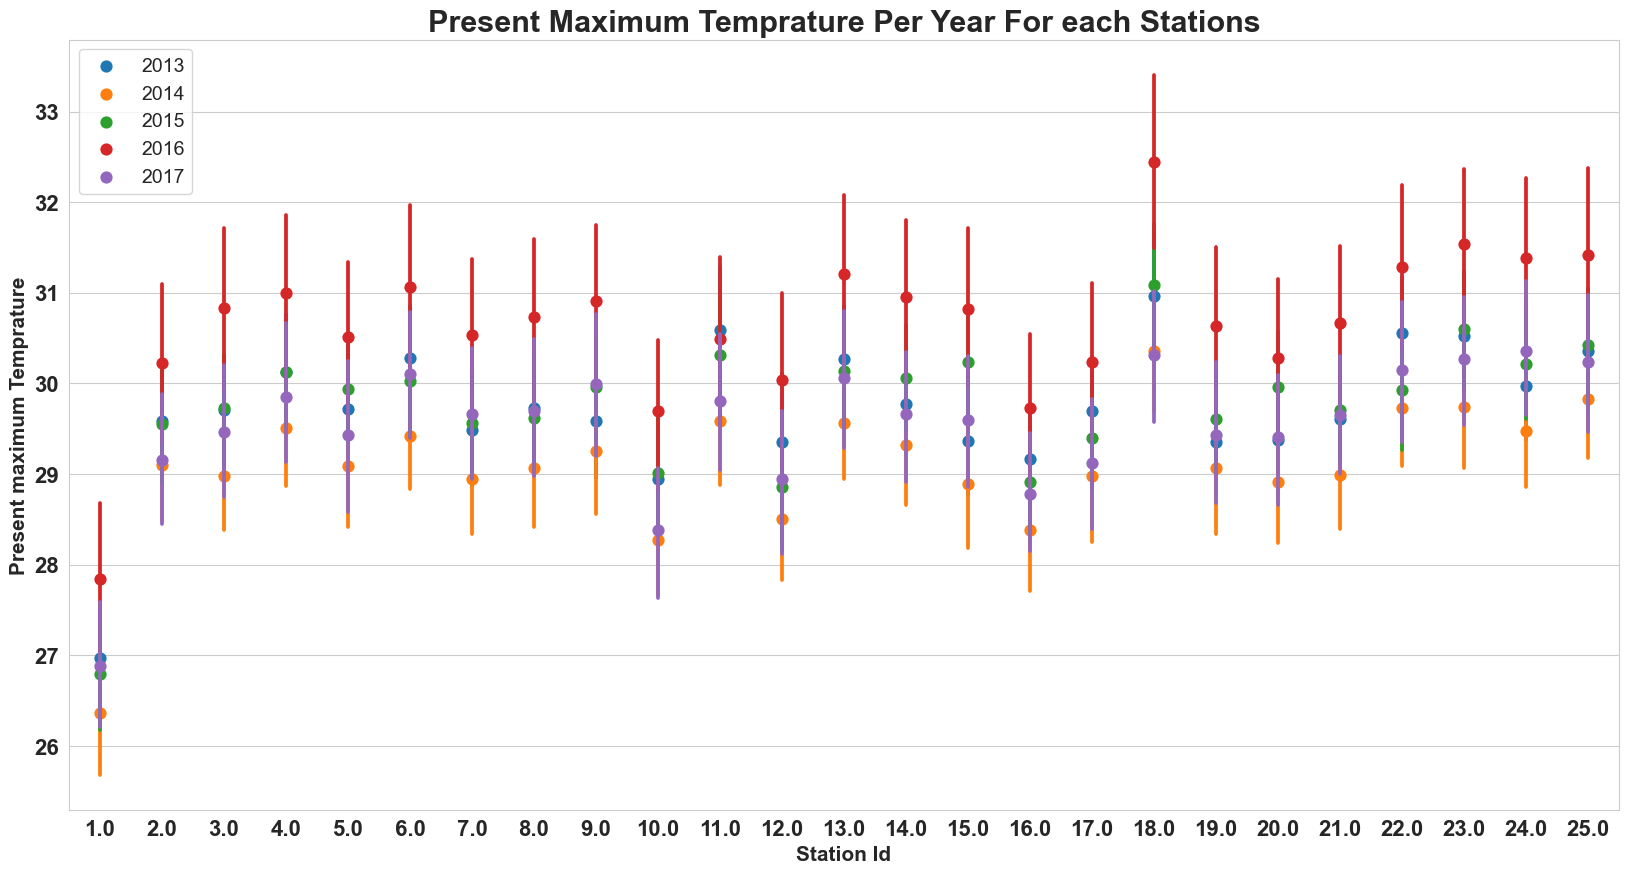

In [22]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x = 'station', y='Present_Tmax', data = data, hue = 'Year', join = False)
plt.title('Present Maximum Temprature Per Year For each Stations', fontsize = 22, fontweight='bold')
plt.xlabel('Station Id',fontsize = 15,fontweight='bold')
plt.ylabel('Present maximum Temprature',fontsize = 15,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=14)

From the above observation, we can say that

* Over all four year higher temprature recorded at stations 18 in compare to rest.
* Stations 1 is coolest stations over all timeframe.
* we can see 2016 is hottest year and 2014 is coolest year. it will be intresting to explore these two year independently.
* Year 2017 is much cooler compare to year 2016.

#### Line plot of present temprature minimum over such stations.

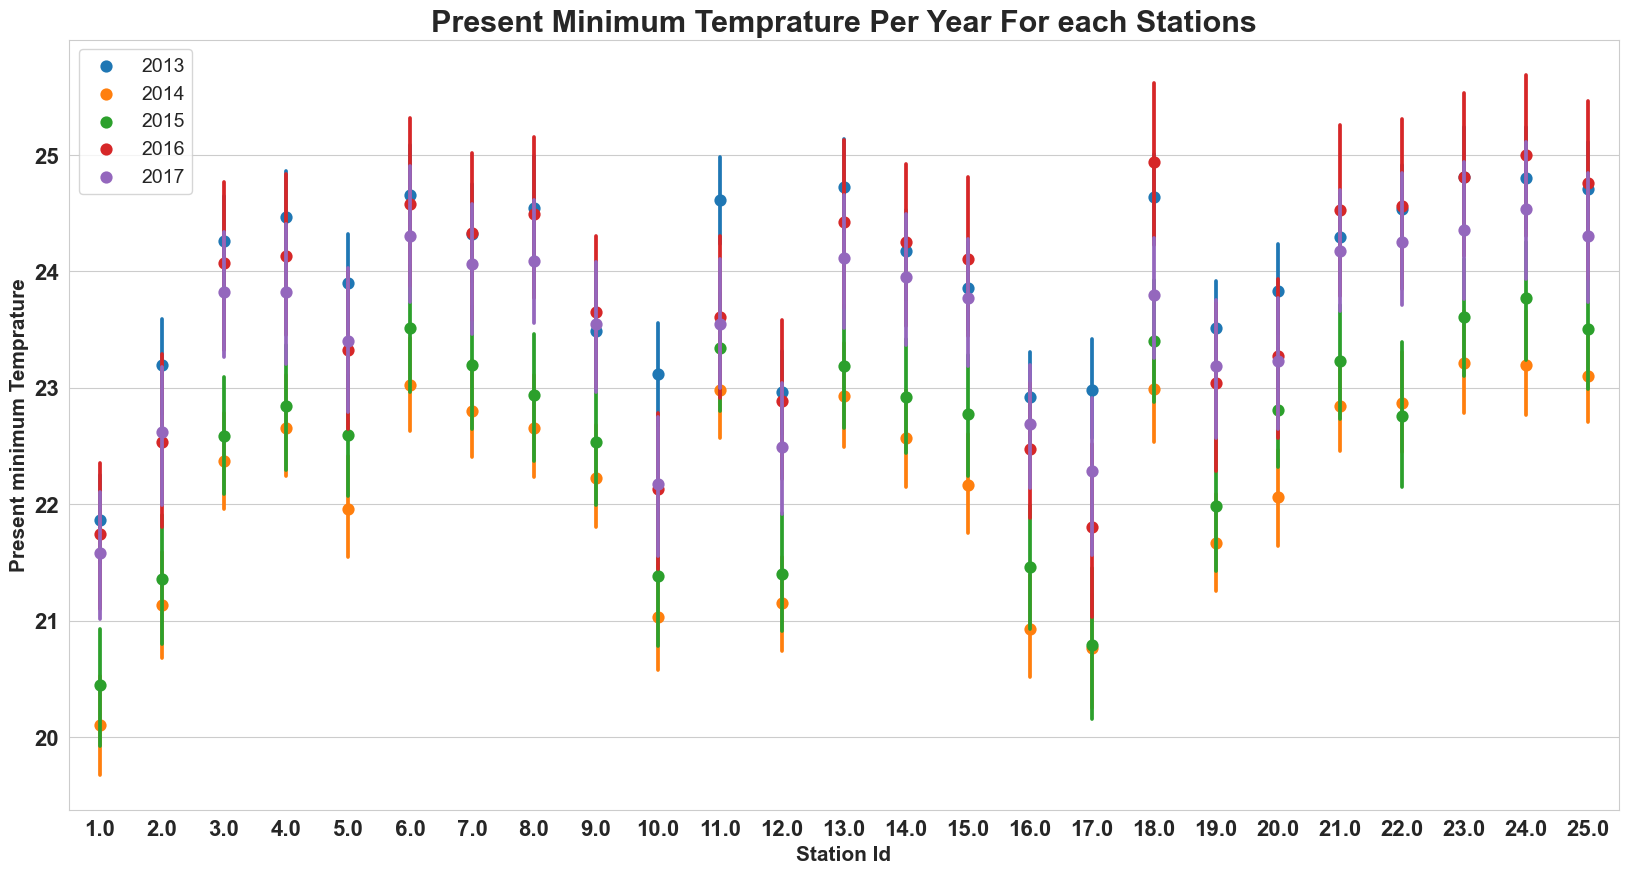

In [23]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x = 'station', y='Present_Tmin', data = data, hue = 'Year', join = False)
plt.title('Present Minimum Temprature Per Year For each Stations', fontsize = 22, fontweight='bold')
plt.xlabel('Station Id',fontsize = 15,fontweight='bold')
plt.ylabel('Present minimum Temprature',fontsize = 15,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=14)

From the above observation, we can say that

* Year 2014 coollest year of all time frame.
* Highest present minimum temprature recorded at station 24 inspite of not having Highest present maximum temprature.This implies that over day period minimum temprature drop recorded at stations 24.
* station 1 is coollest of all the time followed by stations 17. Must be tourist spot in summer.

<Axes: xlabel='Month', ylabel='Solar radiation'>

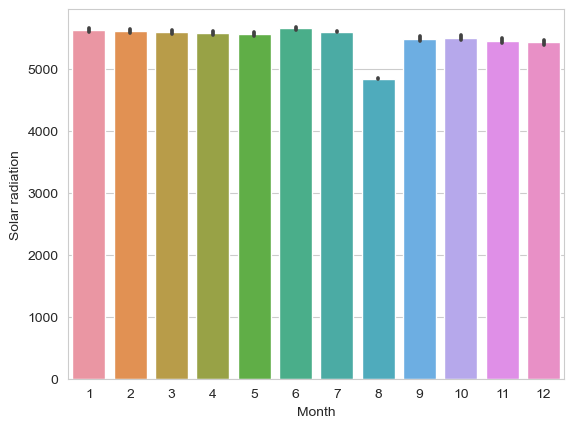

In [24]:
sns.barplot(x=data['Month'], y = data['Solar radiation'])

<Axes: xlabel='Next_Tmax', ylabel='Solar radiation'>

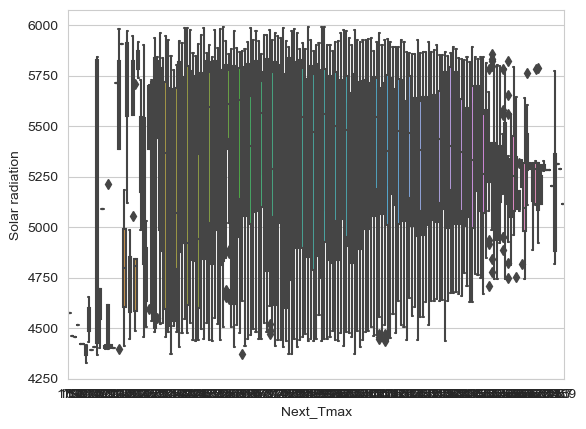

In [25]:
sns.boxplot(x='Next_Tmax', y = 'Solar radiation', data=data)

# Exploration of target variables

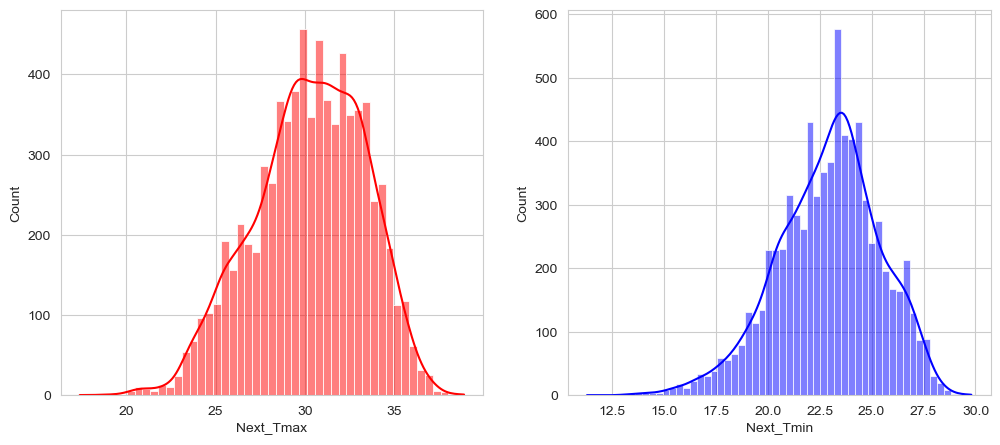

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['Next_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(data['Next_Tmin'],kde=True,color='b')
plt.show()

From the above observation, We get same result as we get in case of present temprature.

* For majority of reading Next Temprature Maximum Varies in between 27.5 to 32.5 degree.
* For majority of reading Next Temprature Minimum Varies in between 22.5 to 26 degree.

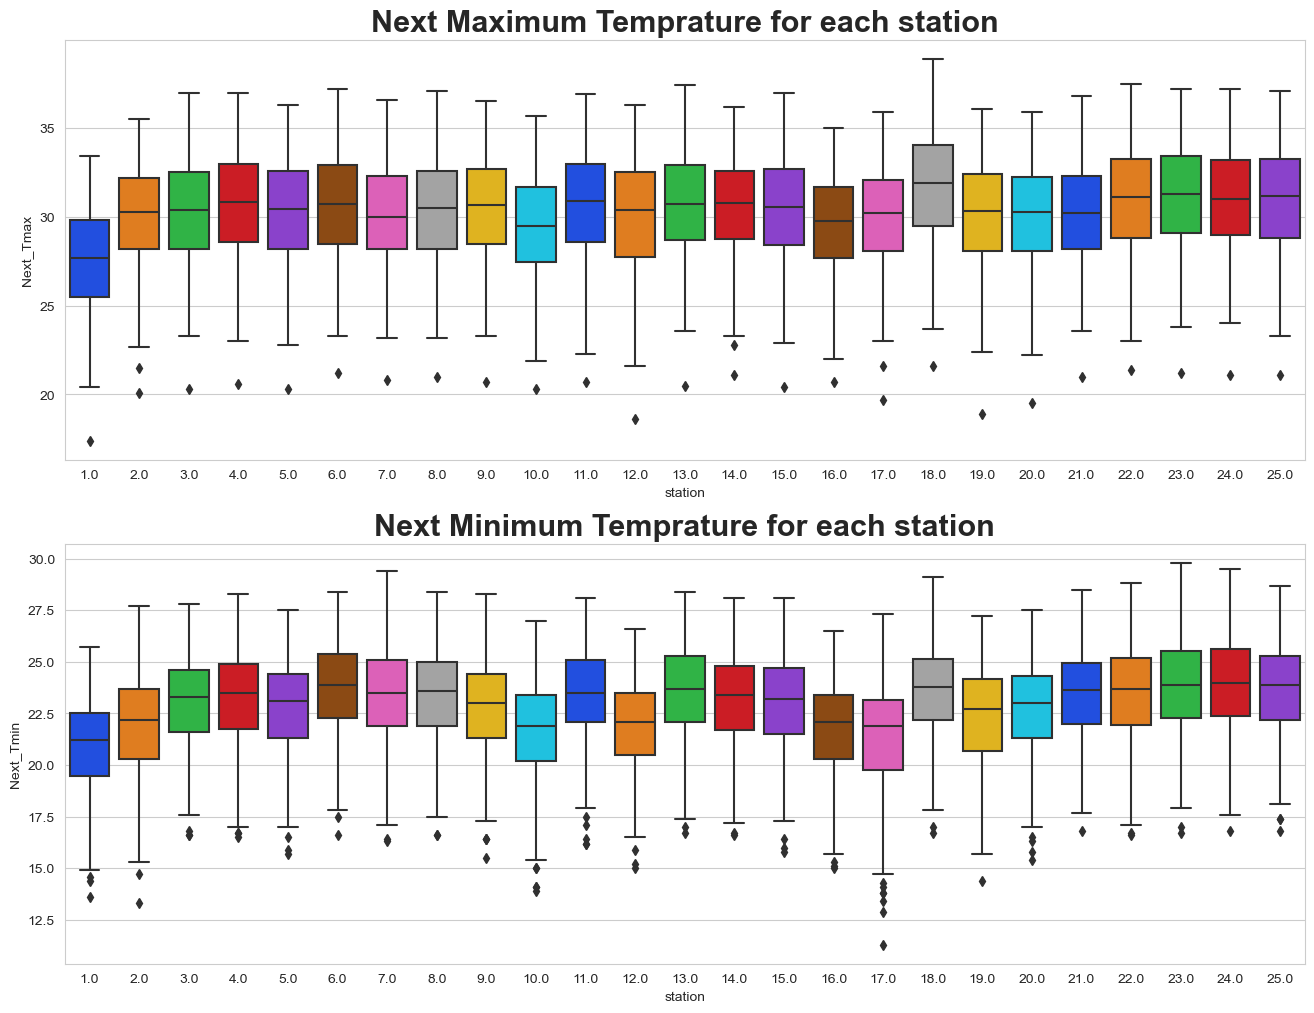

In [27]:
# visulizing the relation between station and target variables.

plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=data,palette='bright')
plt.title('Next Maximum Temprature for each station', fontsize = 22, fontweight = 'bold')
plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=data,palette='bright')
plt.title('Next Minimum Temprature for each station', fontsize = 22, fontweight = 'bold')
plt.show()

From the above observation, we can say that 

* The station 18 has highest temprature collection for both Next_Tmax and Next_Tmin targets.
* Maximum temprature diffrence at same station occur in station 17.

# Next Maximum Temprature V/s Cloud Cover


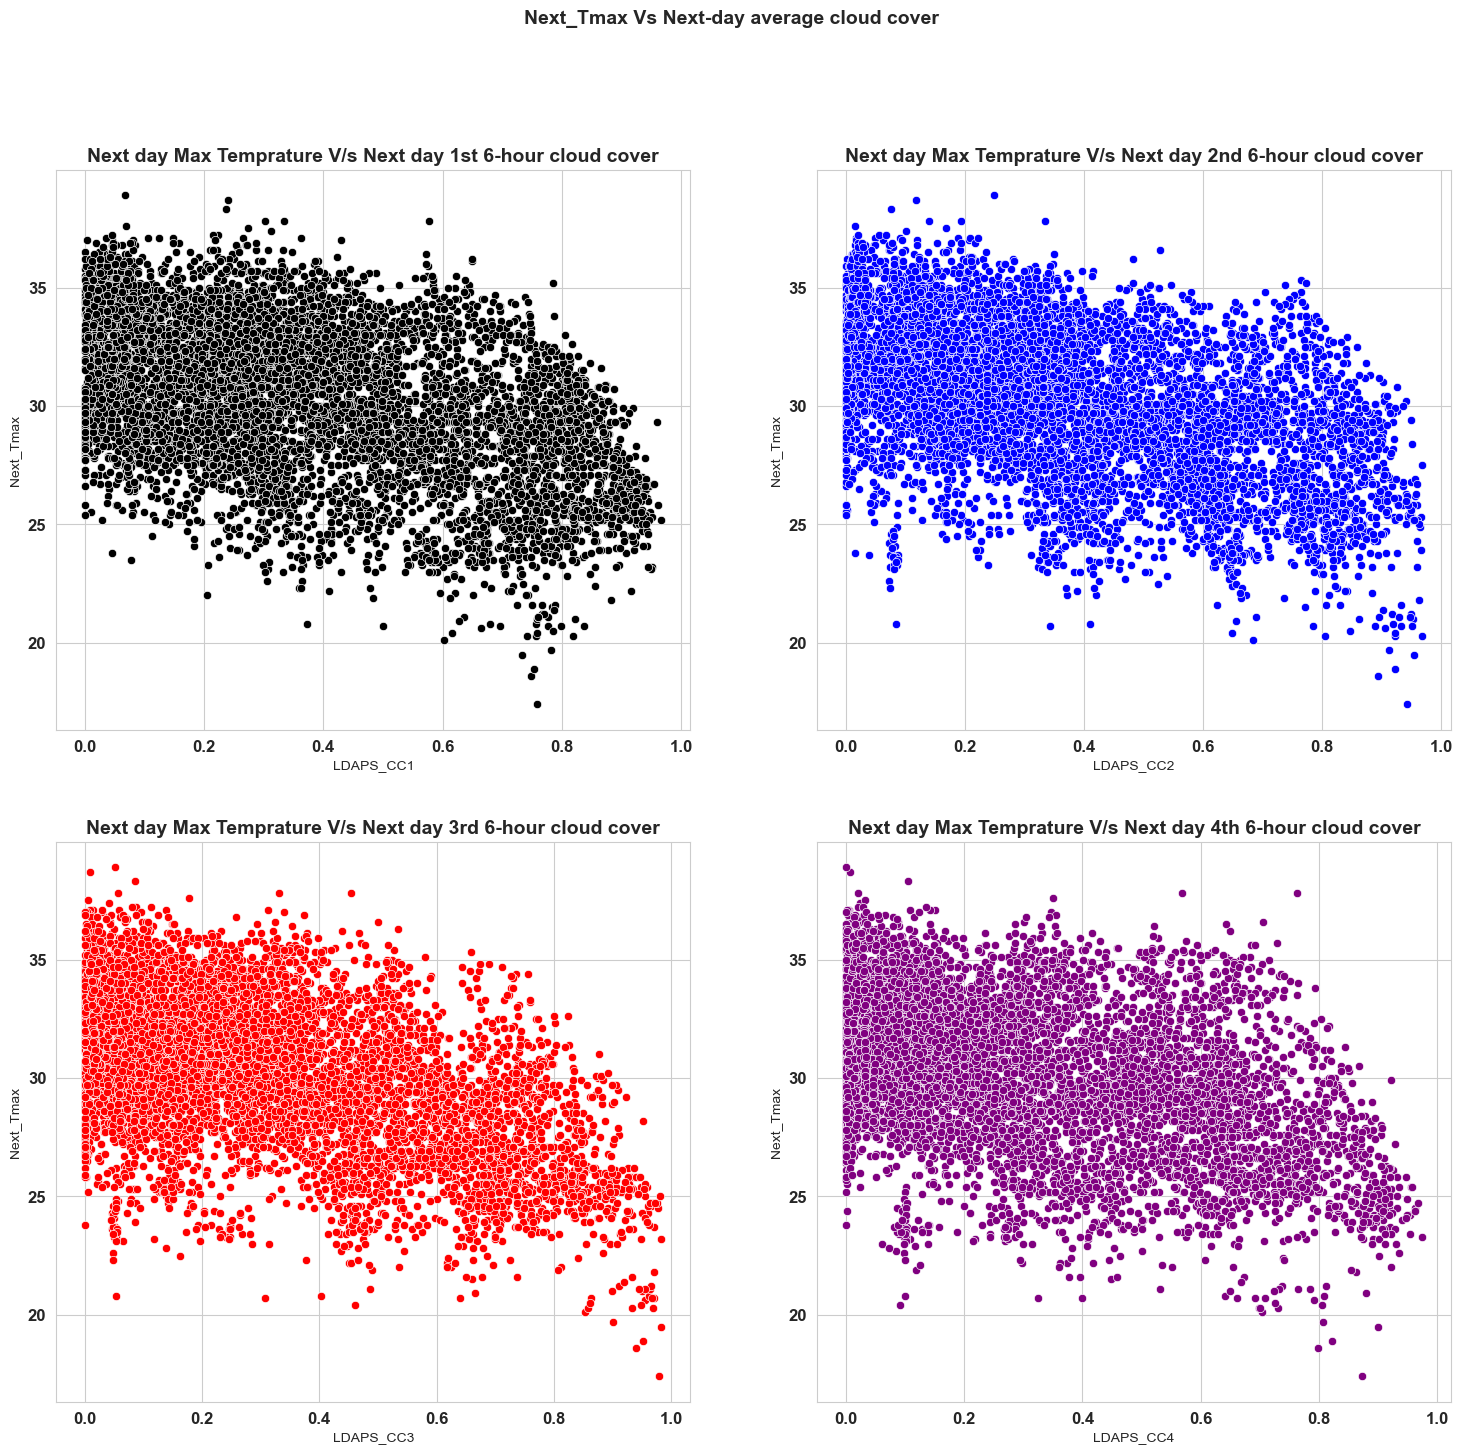

In [28]:
# compare Next day maximum temprature and next day average cloud ever

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover', fontsize = 14, fontweight = 'bold')

plt.subplot(2,2,1)
plt.title('Next day Max Temprature V/s Next day 1st 6-hour cloud cover', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_CC1', y ='Next_Tmax',data=data, color = 'black')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,2)
plt.title('Next day Max Temprature V/s Next day 2nd 6-hour cloud cover', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_CC2', y ='Next_Tmax',data=data, color = 'blue')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,3)
plt.title('Next day Max Temprature V/s Next day 3rd 6-hour cloud cover', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_CC3', y ='Next_Tmax',data=data, color = 'red')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,4)
plt.title('Next day Max Temprature V/s Next day 4th 6-hour cloud cover', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_CC4', y ='Next_Tmax',data=data, color = 'purple')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

#### Irrespective of 6 hrs quater in 24 hrs day time, Next-day Temprature Maximum decrease as cloud cover increase beyond 0.6.

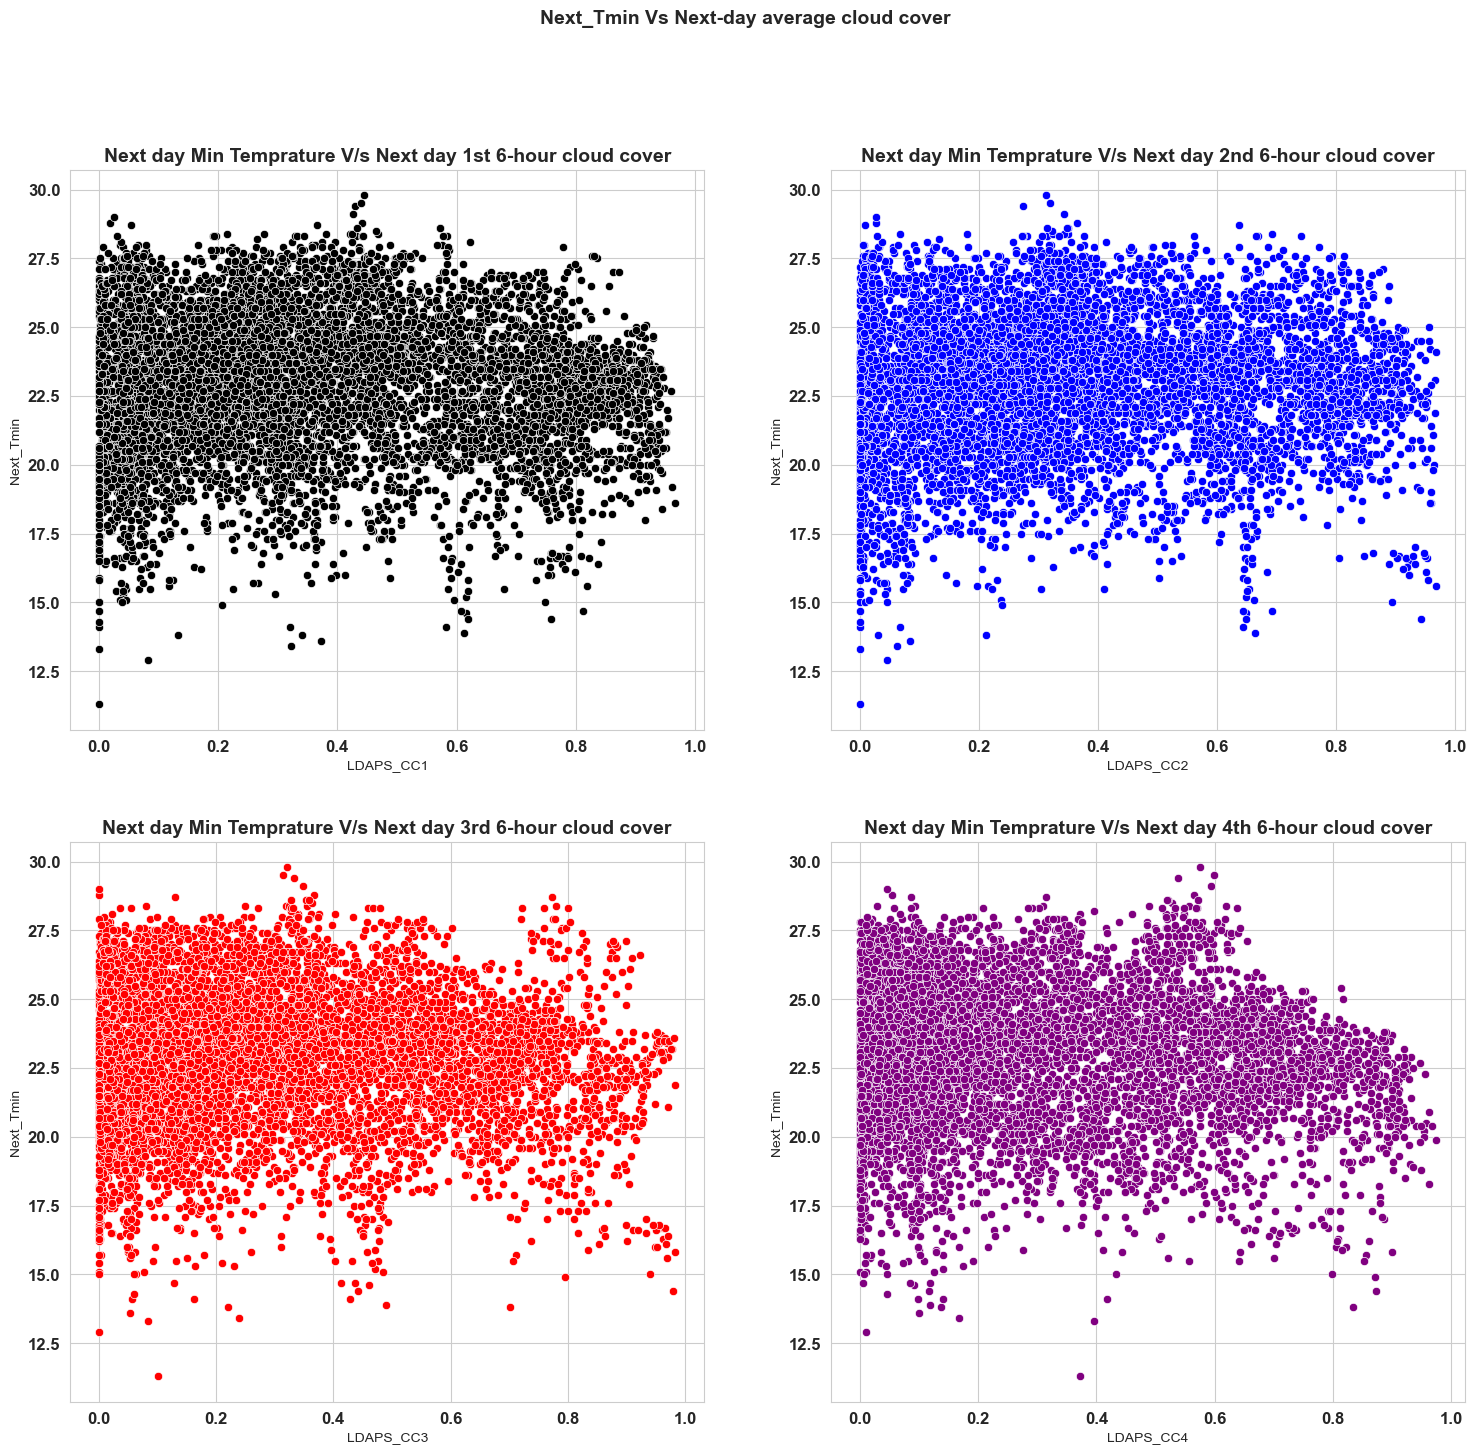

In [29]:
# compare Next day minimum temprature and next day average cloud ever

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover', fontsize = 14, fontweight = 'bold')

plt.subplot(2,2,1)
plt.title('Next day Min Temprature V/s Next day 1st 6-hour cloud cover', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_CC1', y ='Next_Tmin',data=data, color = 'black')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,2)
plt.title('Next day Min Temprature V/s Next day 2nd 6-hour cloud cover', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_CC2', y ='Next_Tmin',data=data, color = 'blue')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,3)
plt.title('Next day Min Temprature V/s Next day 3rd 6-hour cloud cover', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_CC3', y ='Next_Tmin',data=data, color = 'red')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,4)
plt.title('Next day Min Temprature V/s Next day 4th 6-hour cloud cover', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_CC4', y ='Next_Tmin',data=data, color = 'purple')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

#### No significant relation between Next_Tmin and cloud cover in scatterplot.

We can say that Next_Tmin remains unaffected by cloud cover.

#### Solar radiation might most impact on cloud cover and precipitation, its time to explore them.

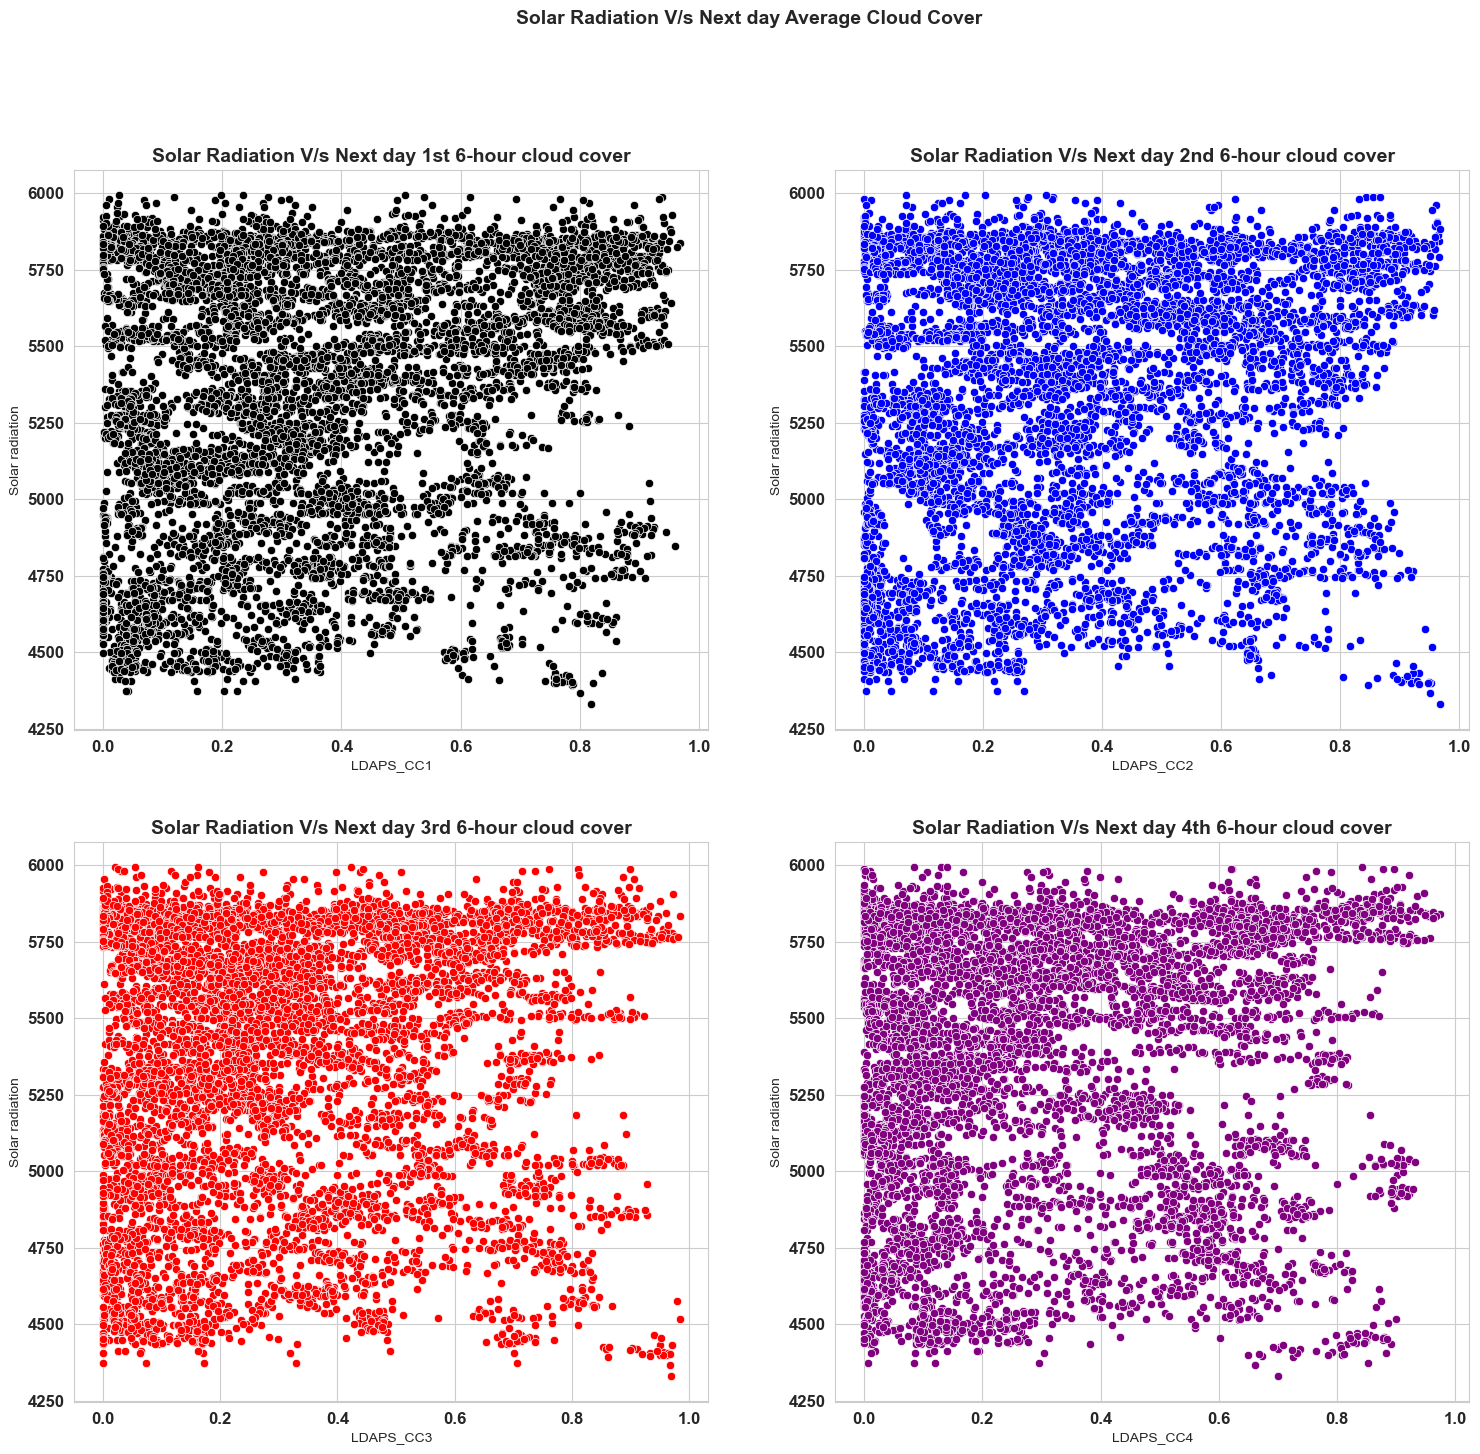

In [30]:
# comparing Next day minimum temprature and next day average cloud cover.

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation V/s Next day Average Cloud Cover', fontsize = 14, fontweight = 'bold')

plt.subplot(2,2,1)
plt.title('Solar Radiation V/s Next day 1st 6-hour cloud cover', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_CC1', y ='Solar radiation',data=data, color = 'black')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,2)
plt.title('Solar Radiation V/s Next day 2nd 6-hour cloud cover', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_CC2', y ='Solar radiation',data=data, color = 'blue')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,3)
plt.title('Solar Radiation V/s Next day 3rd 6-hour cloud cover', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_CC3', y ='Solar radiation',data=data, color = 'red')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,4)
plt.title('Solar Radiation V/s Next day 4th 6-hour cloud cover', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_CC4', y ='Solar radiation',data=data, color = 'purple')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

We can definently say that for cloud cover greater than 0.7 high value solar radiation contribution most.

# Precipitation V/s Solar Radiation

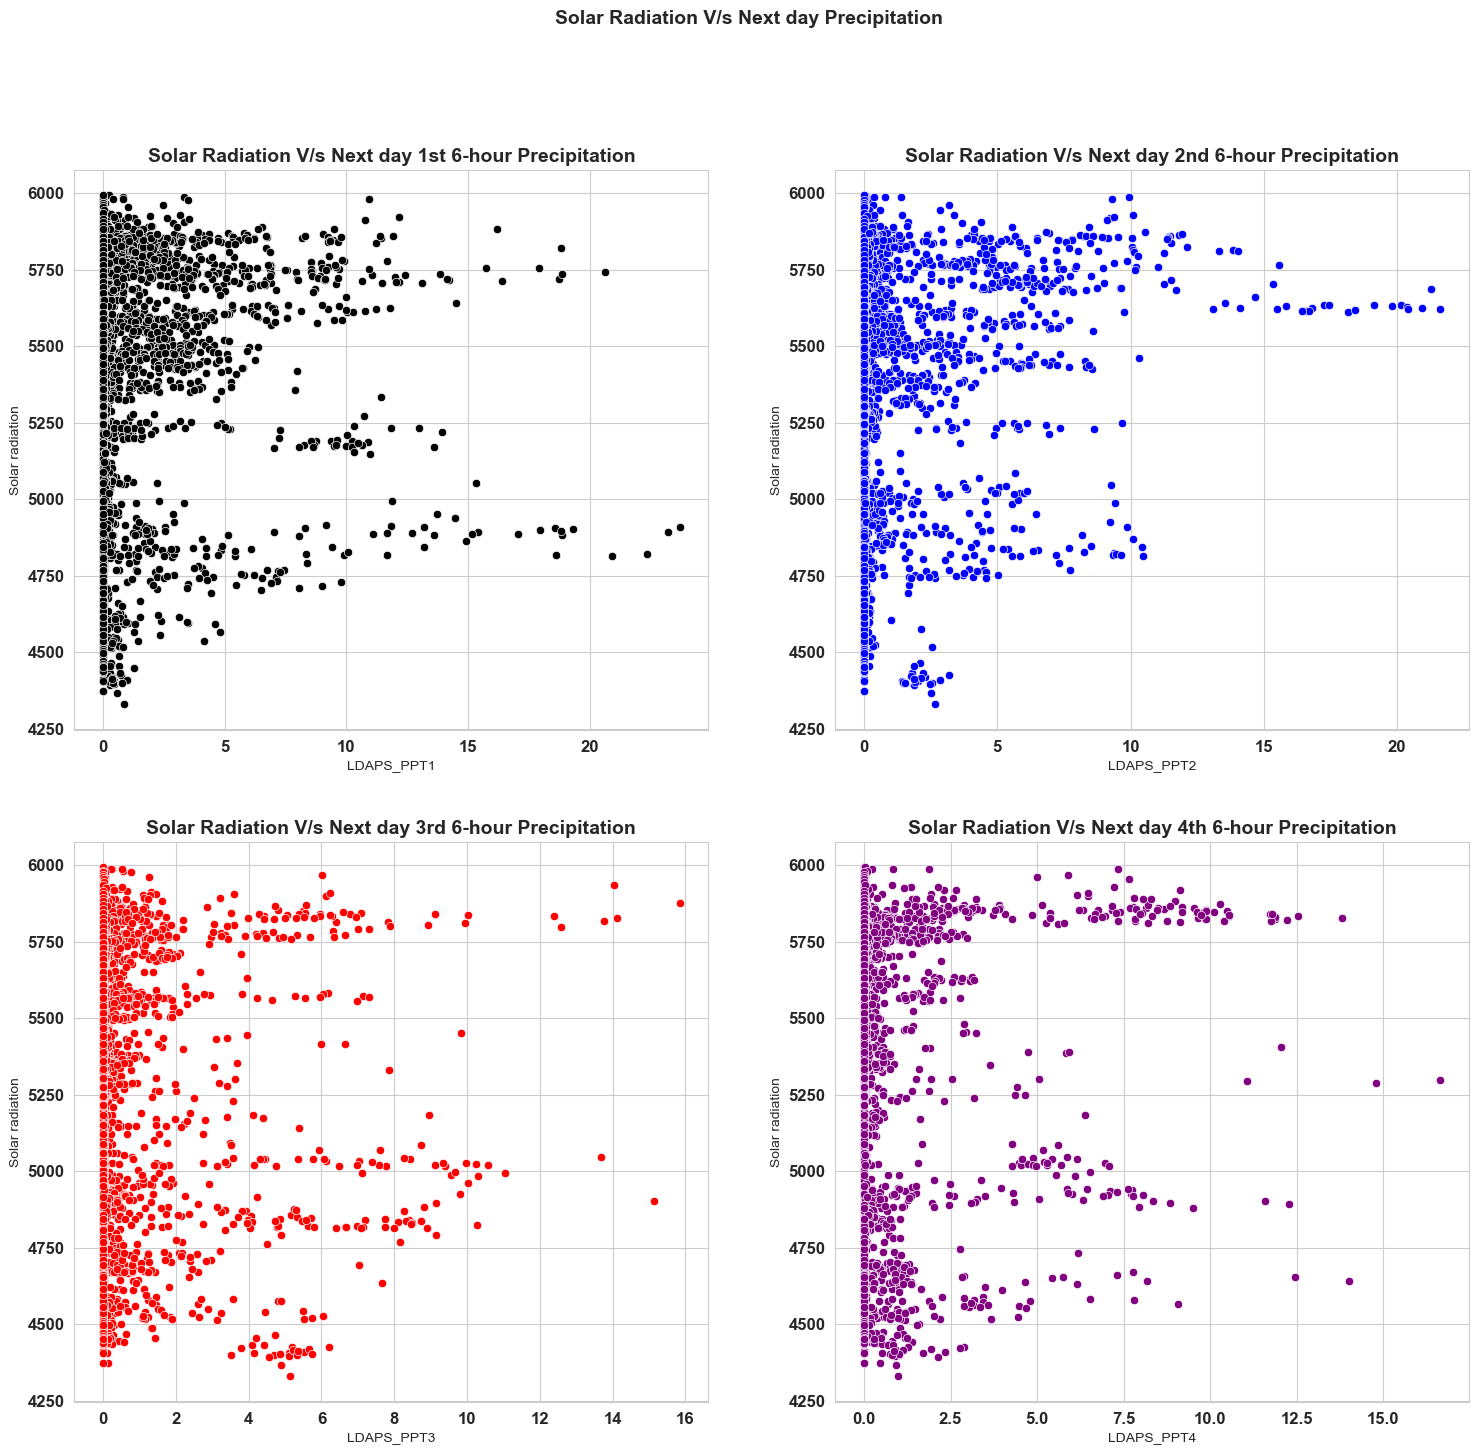

In [31]:
plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation V/s Next day Precipitation', fontsize = 14, fontweight = 'bold')

plt.subplot(2,2,1)
plt.title('Solar Radiation V/s Next day 1st 6-hour Precipitation', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_PPT1', y ='Solar radiation',data=data, color = 'black')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,2)
plt.title('Solar Radiation V/s Next day 2nd 6-hour Precipitation', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_PPT2', y ='Solar radiation',data=data, color = 'blue')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,3)
plt.title('Solar Radiation V/s Next day 3rd 6-hour Precipitation', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_PPT3', y ='Solar radiation',data=data, color = 'red')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,4)
plt.title('Solar Radiation V/s Next day 4th 6-hour Precipitation', fontsize = 14, fontweight='bold')
sns.scatterplot(x = 'LDAPS_PPT4', y ='Solar radiation',data=data, color = 'purple')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

From the above observation, we can say that 

* irrespective of to which 6 hrs quator reading belong, solar radiation value greater than 5500w/m2 leads to higher amount of precipitation (normally greater than 8).
* if we considered scatterplot of solar radiation vs cloud cover along with above scatter plot, we can draw inference that for higher value of solar radiation cloud cover and precipitation followed each other. In other words higher precipitation means higher cloud cover.

# Now, we investigate variation of temprature over duration of one year period?


<Axes: xlabel='Month', ylabel='LDAPS_PPT1'>

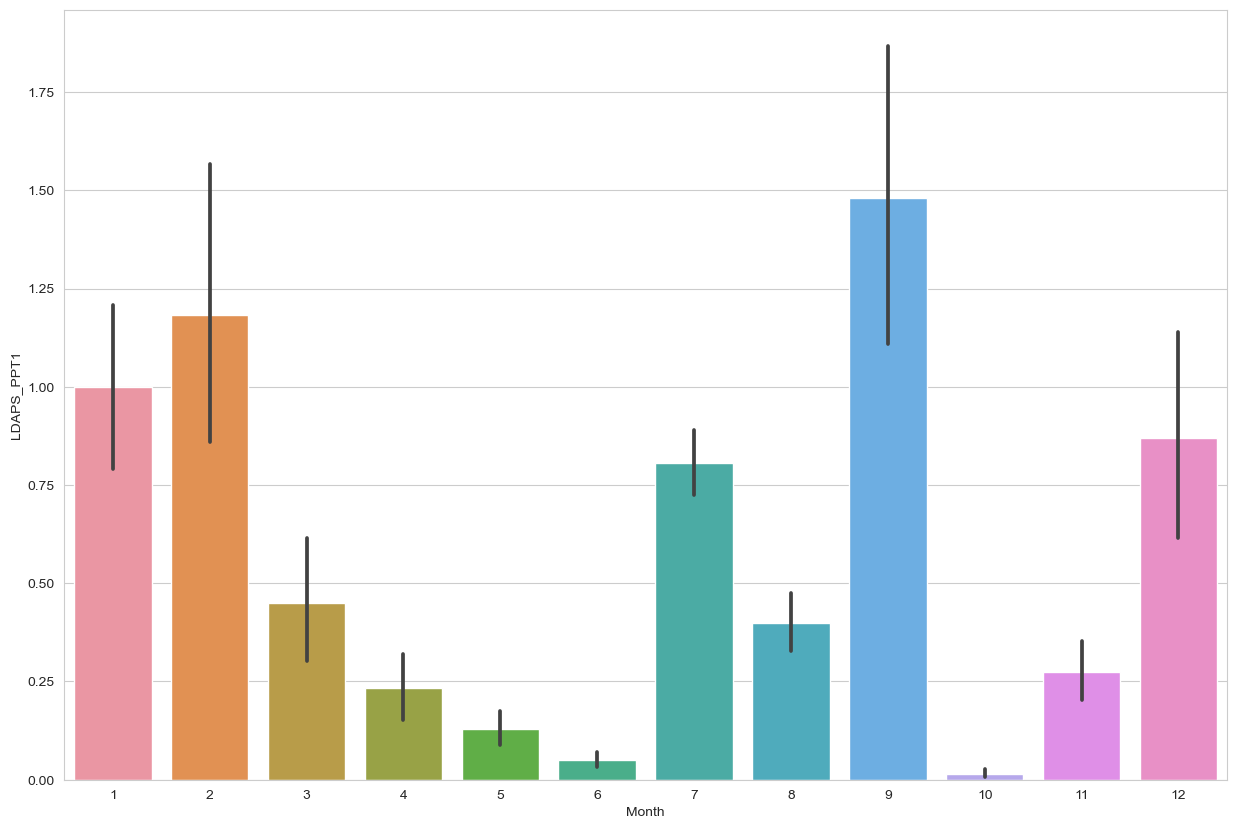

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(x='Month',y='LDAPS_PPT1',data=data)

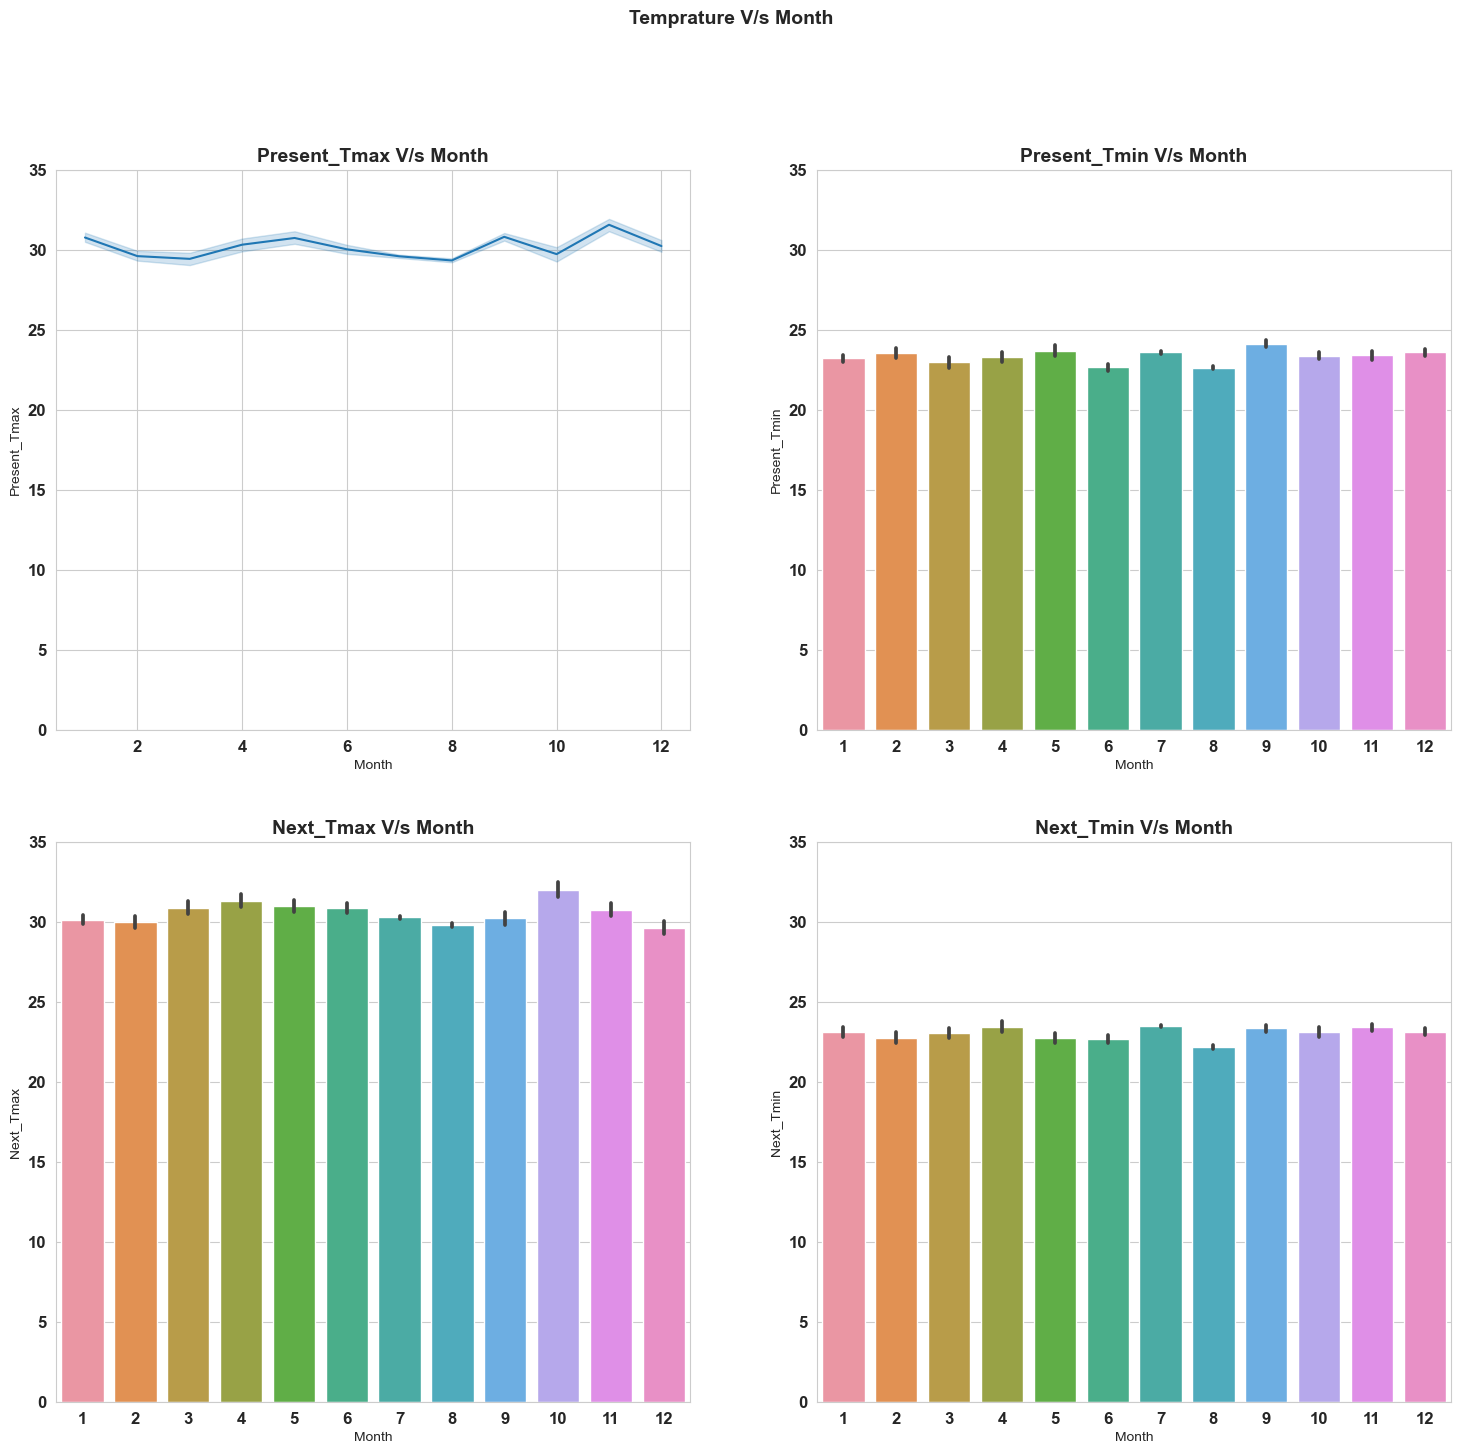

In [33]:
# comparing next days minimum temprature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Temprature V/s Month', fontsize = 14, fontweight = 'bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax V/s Month', fontsize = 14, fontweight='bold')
axes =sns.lineplot(y ='Present_Tmax',x = 'Month',data=data)
axes.set_ylim([0,35])
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin V/s Month', fontsize = 14, fontweight='bold')
axes =sns.barplot(y ='Present_Tmin',x = 'Month', data=data)
axes.set_ylim([0,35])
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax V/s Month', fontsize = 14, fontweight='bold')
axes =sns.barplot(y ='Next_Tmax',x = 'Month', data=data)
axes.set_ylim([0,35])
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin V/s Month', fontsize = 14, fontweight='bold')
axes =sns.barplot(y ='Next_Tmin',x = 'Month', data=data)
axes.set_ylim([0,35])
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

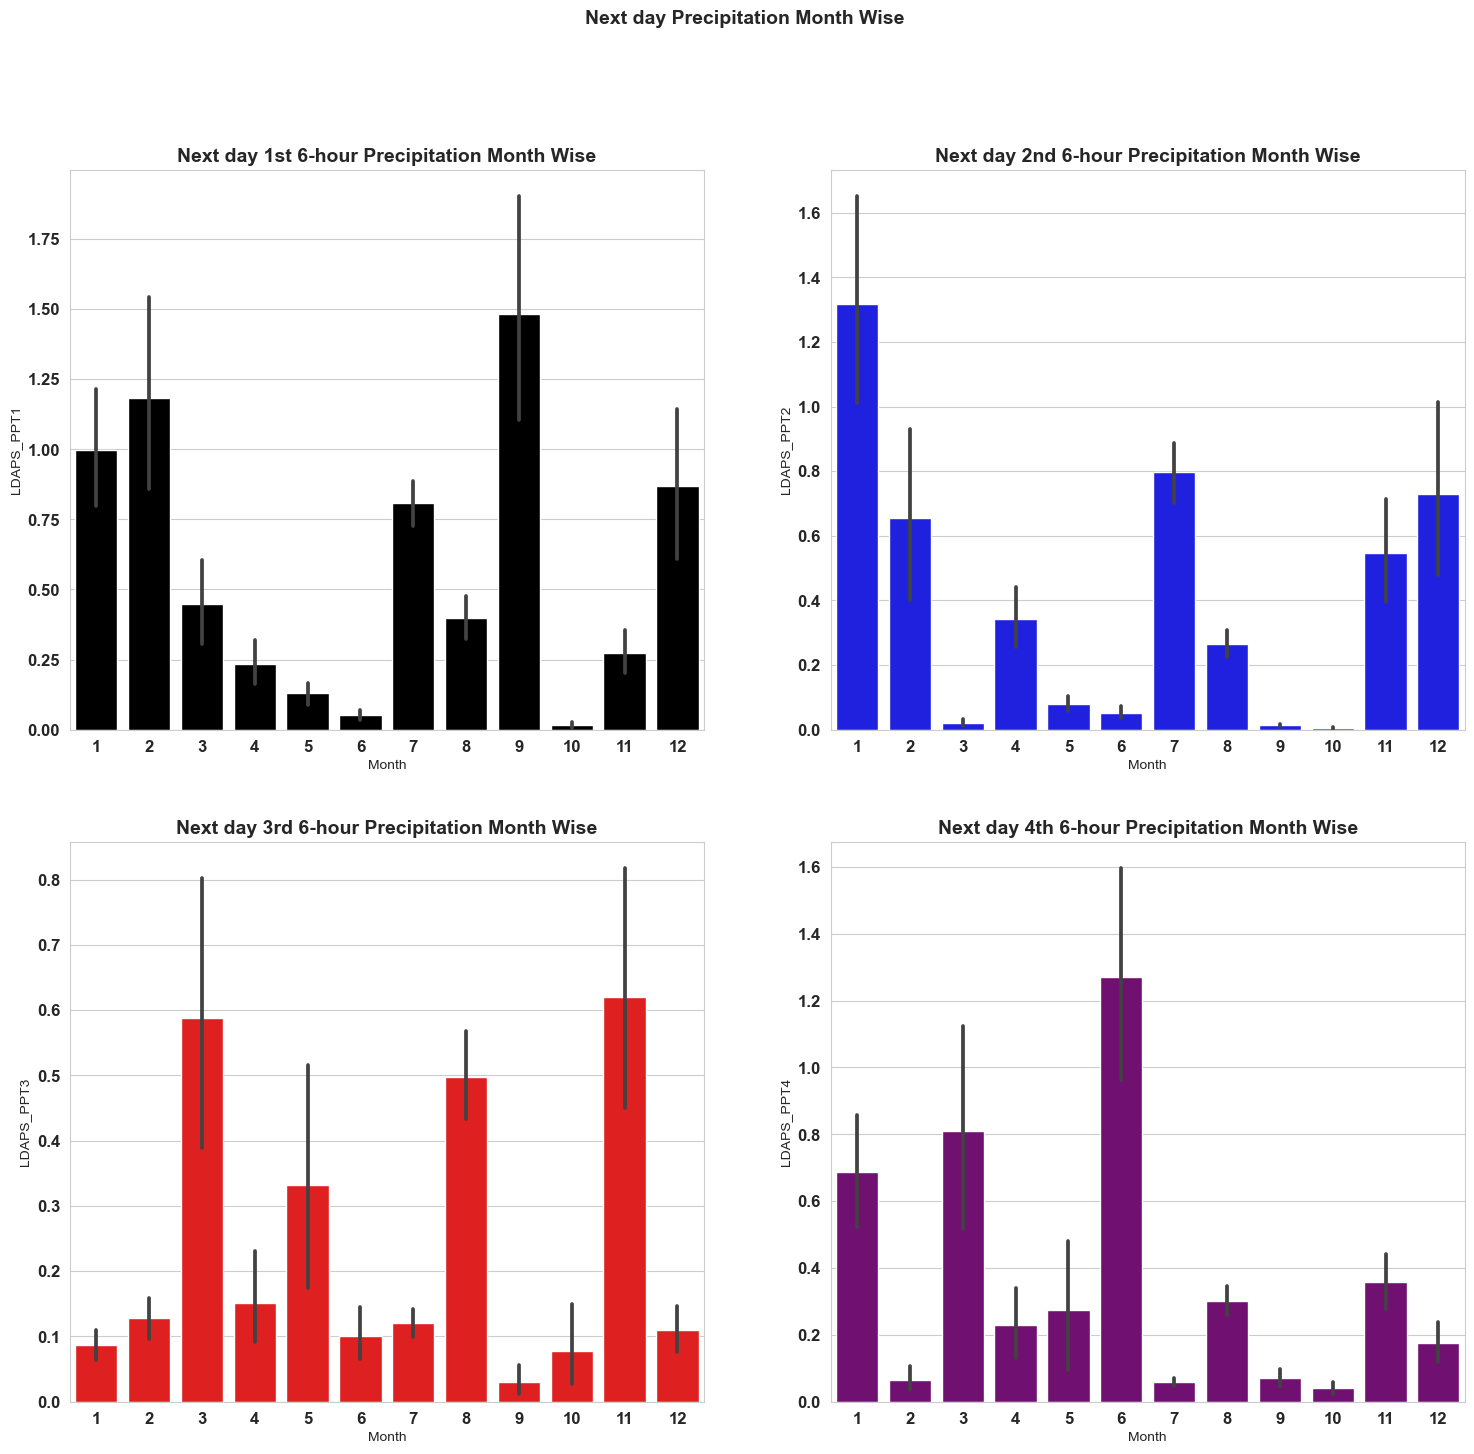

In [34]:
# compare Next day minimum temprature and next day average cloud cover
plt.figure(figsize=(18,16))
plt.suptitle('Next day Precipitation Month Wise', fontsize = 14, fontweight = 'bold')

plt.subplot(2,2,1)
plt.title('Next day 1st 6-hour Precipitation Month Wise', fontsize = 14, fontweight='bold')
sns.barplot(y = 'LDAPS_PPT1', x ='Month',data=data, color = 'black')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,2)
plt.title('Next day 2nd 6-hour Precipitation Month Wise', fontsize = 14, fontweight='bold')
sns.barplot(y = 'LDAPS_PPT2', x ='Month',data=data, color = 'blue')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,3)
plt.title('Next day 3rd 6-hour Precipitation Month Wise', fontsize = 14, fontweight='bold')
sns.barplot(y = 'LDAPS_PPT3', x ='Month',data=data, color = 'red')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.subplot(2,2,4)
plt.title('Next day 4th 6-hour Precipitation Month Wise', fontsize = 14, fontweight='bold')
sns.barplot(y = 'LDAPS_PPT4', x ='Month',data=data, color = 'purple')
plt.xticks(fontsize = 12, fontweight='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.show()

From the above observation, we can say that

* In 9 month highest precipitation observe in 1st quater of day.
* In 1st month highest precipitation observe in 2nd quater of day.
* In 11th month highest precipitation in 3rd quater of day.
* In 6th month highest precipitation in 4th quater of day.

Minimum solar radiation : 4329.520508
Maximum solar radiation : 5992.895996
Average solar radiation : 5343.724207856747


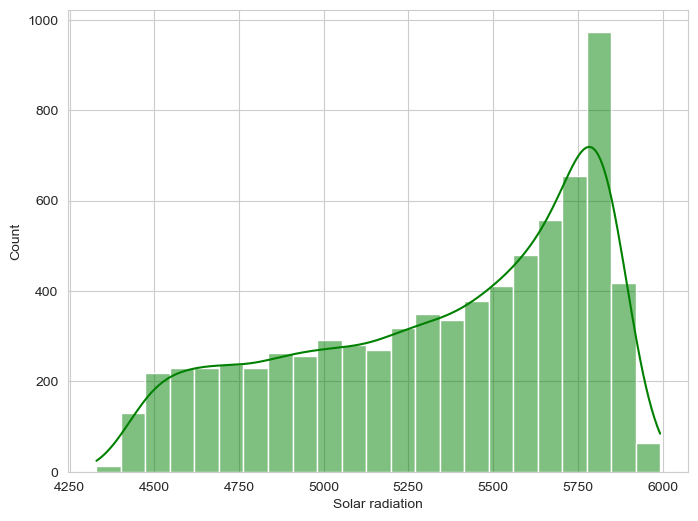

In [35]:
plt.figure(figsize=(8,6))
sns.histplot(data['Solar radiation'], kde=True, color='green')
print('Minimum solar radiation :',data['Solar radiation'].min())
print('Maximum solar radiation :',data['Solar radiation'].max())
print('Average solar radiation :',data['Solar radiation'].mean())

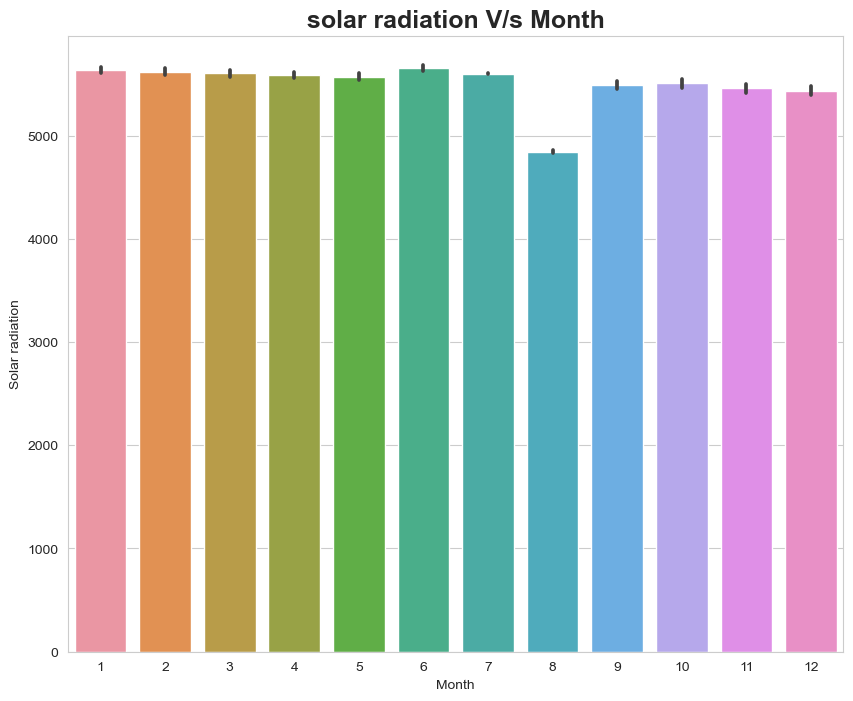

In [36]:
sns.set_palette('husl')
plt.figure(figsize=(10,8))
sns.barplot(x='Month',y='Solar radiation', data=data)
plt.title('solar radiation V/s Month', fontsize =18, fontweight = 'bold')
plt.show()

From the above observation, we can say that

* solar radiation data is skewed.
* it has a minimum value at 4329.52 Wh/m2 and maximum values at 5992.89 Wh/m2
* for most of reading solar radiation values lies in the range 5600 to 5850.
* Minimum solar radiation occur in month of 8.

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.0940966991598575 m/s


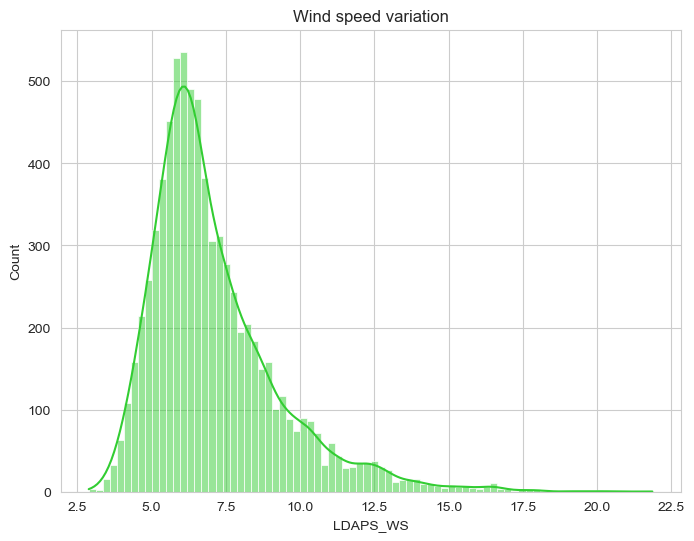

In [38]:
plt.figure(figsize=(8,6))
sns.histplot(data['LDAPS_WS'], kde=True,color = 'limegreen')
plt.title('Wind speed variation')
print('Minimum Wind Speed :',data['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',data['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',data['LDAPS_WS'].mean(),'m/s')

From the above observation, we can say that 

* It have its minimum value at 2.88m/s and maximum values at 21.85 m/s.
* For most of reading values lies in the rabge 5m/s to 8 m/s
* Graph is slightly right skewed.

Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 19.79466629 % and Maximum RHmin is 98.5247345 %


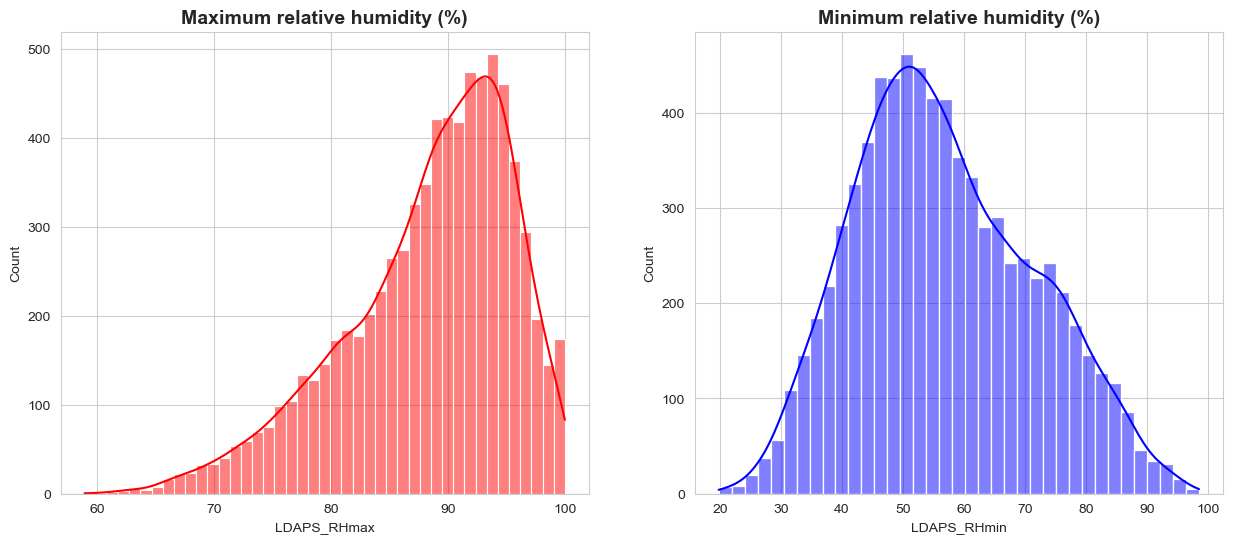

In [39]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data['LDAPS_RHmax'], kde = True, color = 'r')
plt.title('Maximum relative humidity (%)', fontsize = 14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(data['LDAPS_RHmin'], kde = True, color = 'b')
plt.title('Minimum relative humidity (%)', fontsize = 14, fontweight='bold')
print("Minimum RHmax is {} % and Maximum RHmax is {} %".format(data['LDAPS_RHmax'].min(), data['LDAPS_RHmax'].max()))
print("Minimum RHmin is {} % and Maximum RHmin is {} %".format(data['LDAPS_RHmin'].min(), data['LDAPS_RHmin'].max()))

From the above observation, we can say that

* Data of maximum relative humidity is left skewed and Data of minimum relative humidity is slightly right skewed.
* Maximum relative humidity for most of the days lie in the range 90 to 97.
* Maximum relative humidity lies in the range 45 to 62.

Miniimum Tmax applied lapse rate is 17.62495378 % and Maximum Tmax applied lapse rate is 38.54225522 %
Miniimum Tmax applied lapse rate is 14.27264631 % and Maximum Tmax applied lapse rate is 29.61934244 %


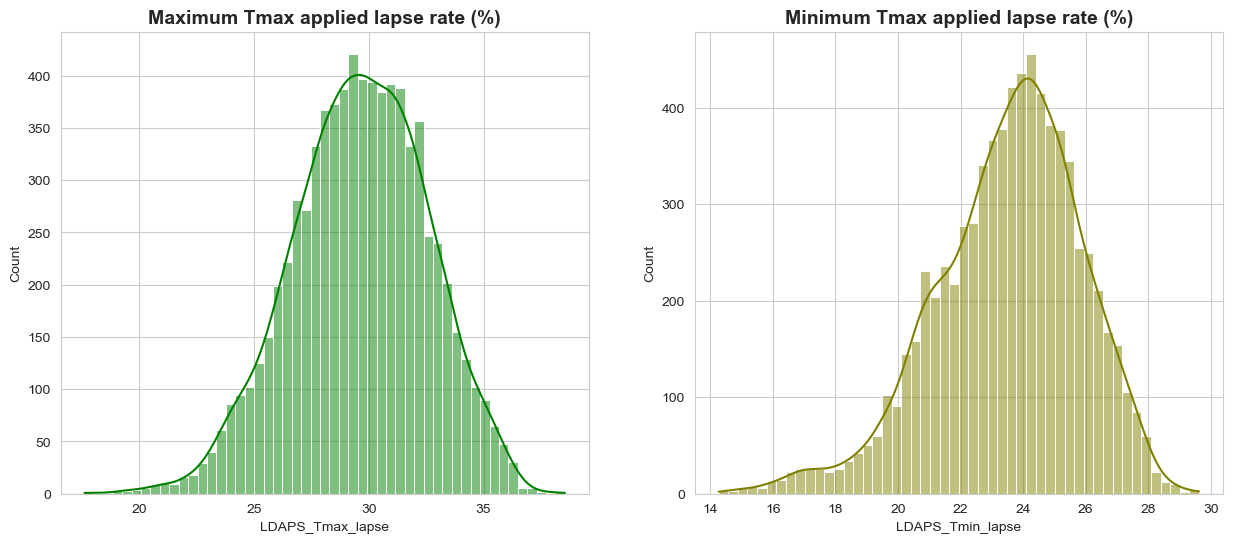

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data['LDAPS_Tmax_lapse'], kde = True, color = 'g')
plt.title('Maximum Tmax applied lapse rate (%)', fontsize = 14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(data['LDAPS_Tmin_lapse'], kde = True, color = 'olive')
plt.title('Minimum Tmax applied lapse rate (%)', fontsize = 14, fontweight='bold')
print("Miniimum Tmax applied lapse rate is {} % and Maximum Tmax applied lapse rate is {} %".format(data['LDAPS_Tmax_lapse'].min(), data['LDAPS_Tmax_lapse'].max()))
print("Miniimum Tmax applied lapse rate is {} % and Maximum Tmax applied lapse rate is {} %".format(data['LDAPS_Tmin_lapse'].min(), data['LDAPS_Tmin_lapse'].max()))

From the above observation

* Tmax and Tmin for applied lapse rate are almost are normally distributed.
* Tmax_lapse for majority of days its values lies in range 27 to 33 (A C)
* Tmin_lapse for majority of days its values lies in range 23 to 26 (A C)

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988


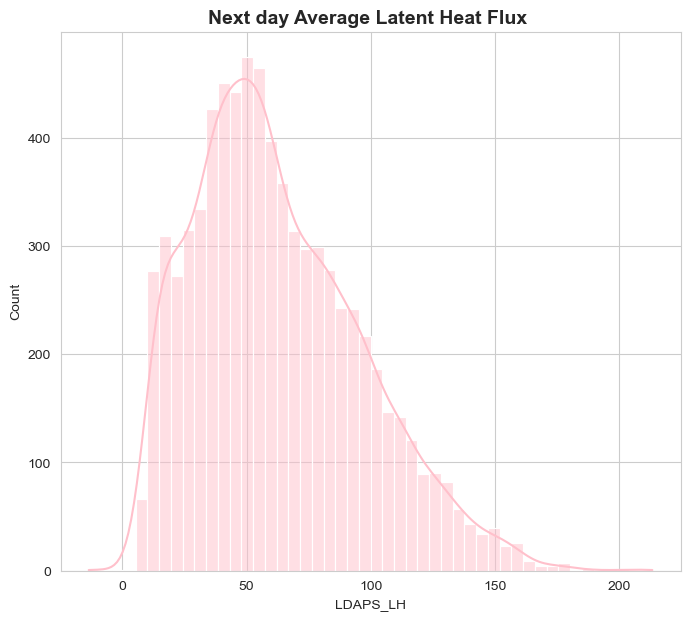

In [41]:
plt.figure(figsize=(8,7))
sns.histplot(data['LDAPS_LH'], kde = True, color = 'pink')
plt.title('Next day Average Latent Heat Flux ', fontsize = 14, fontweight='bold')
print('Minimum Latent Heat Flux :',data['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',data['LDAPS_LH'].max())
print('Average Latent Heat Flux :',data['LDAPS_LH'].mean())

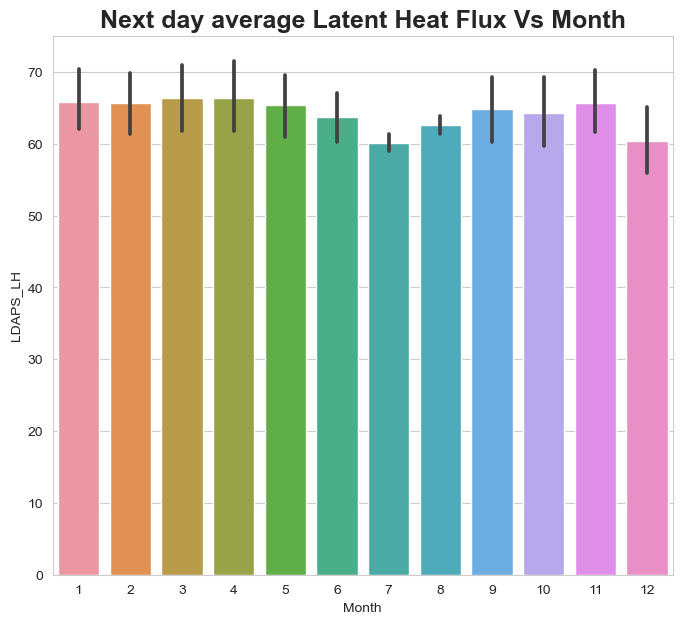

In [42]:
plt.figure(figsize=(8,7))
sns.barplot(x='Month', y = 'LDAPS_LH',data=data)
plt.title("Next day average Latent Heat Flux Vs Month", fontsize =18, fontweight='bold')
plt.show()

#### Minimum latent Heat Flux Observe in month of july.

# Encoding Categorial data

In [43]:
data.columns.to_series().groupby(data.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], datetime64[ns]: ['Date'], int64: ['Day', 'Month', 'Year'], object: ['State', 'City']}

In [44]:
#using label encoder on target variables

from sklearn.preprocessing import LabelEncoder
category=['State','City']
le = LabelEncoder()
for i in category:
    
    data[i] = le.fit_transform(data[i])
data.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  State  City  
0       21.2   30      6  2013      1     6  
1       22.5   30      6  2013      1     6  
2       23.9   30      6  2013      1     6  
3       24.3   30      6  2013      1     6  
4       22.5   30      6  2013      0     3

In [45]:
# droping unnecessary columns

data.drop(['Date'],axis = 1,inplace=True)

# Features Selection and Engineering

#### Outlier detections and removal.

In [46]:
data.shape

(7588, 29)

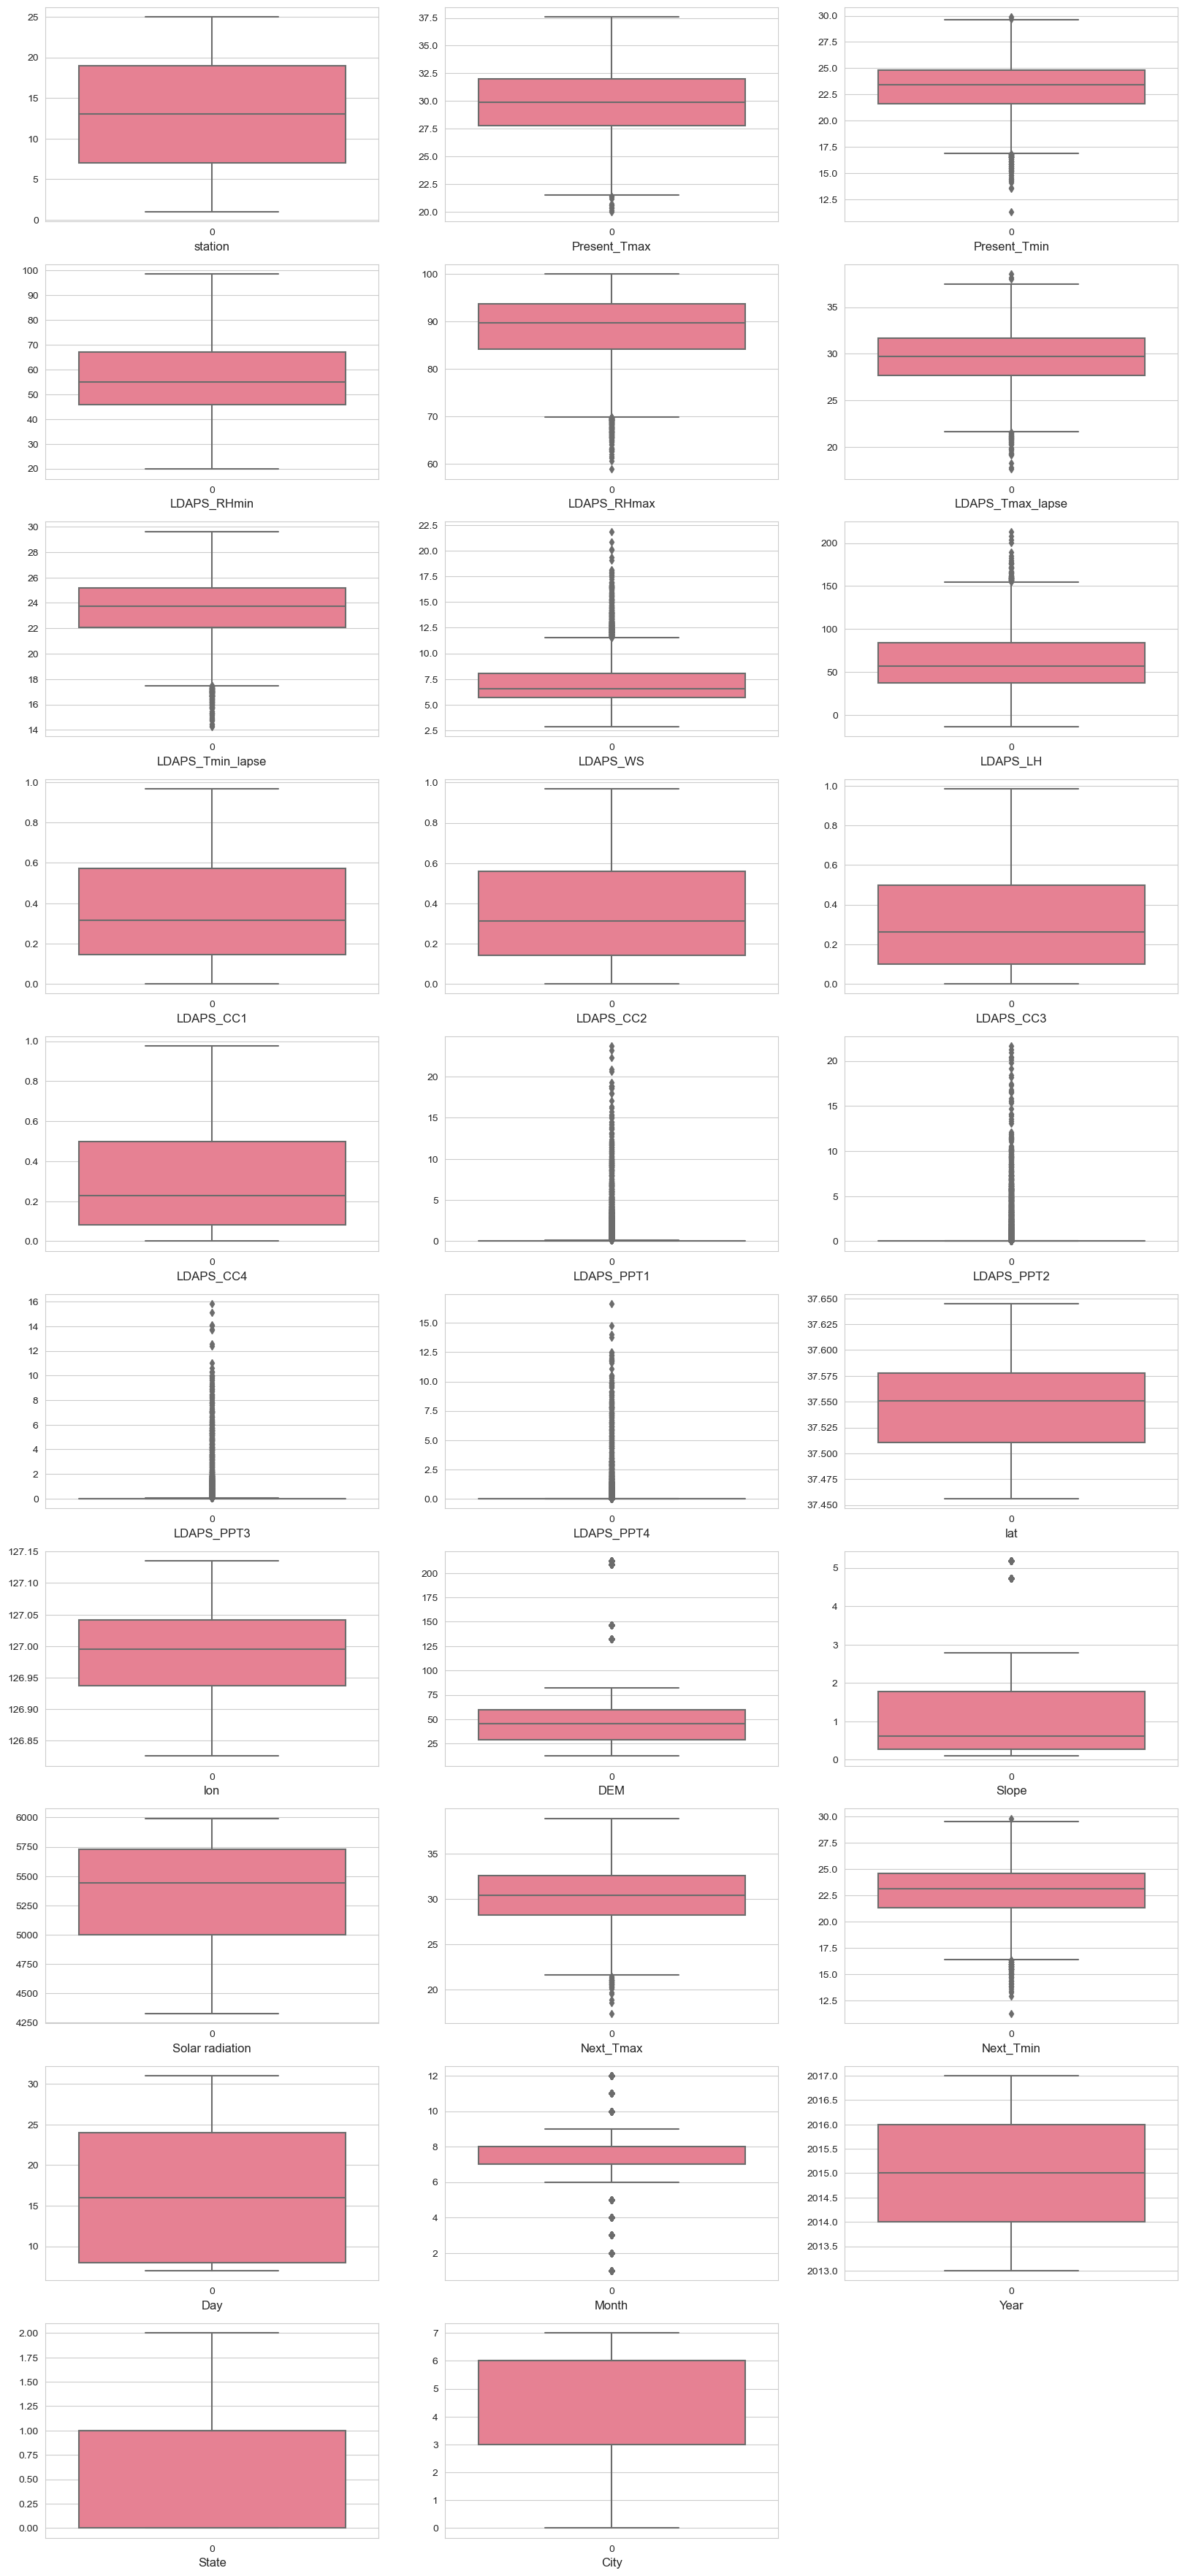

In [47]:
plt.figure(figsize=(20,45), facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber <=29:
        ax = plt.subplot(10,3, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize = 12)
    plotnumber+=1
plt.show()

#### Outlier removal usig Z-score mehtod

In [48]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
df = data[(z<3).all(axis = 1)]
print("Shape of the dataframe before removing outliers: ",data.shape)
print("Shape of the dataframe after removing outliers: ",df.shape)

Shape of the dataframe before removing outliers:  (7588, 29)
Shape of the dataframe after removing outliers:  (6739, 29)


In [49]:
data = df.copy()

# Skewness of features

In [50]:
data.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
State               0.143188
City               -0.951530
dtype: float64

#### Here some are positively skewed while other are negatively skewed.We gone use yeo-johnson mehtod for transformation.

In [51]:
skew = ['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1',
        'LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

LDAPS_RHmax  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC3  LDAPS_CC4  \
0     0.348222         -0.357311  0.176871  0.349992  -0.460839  -0.512476   
1     0.261118          0.109008 -0.574617 -0.166810  -0.474101  -0.532674   
2    -0.717348          0.361065 -0.252083 -1.378337  -0.222547  -0.443077   
3     1.375094         -0.215595 -0.606795  0.245926  -0.464009  -0.491694   
4     0.186035         -0.143389 -0.541825  1.298111  -0.361649  -0.278264   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM     Slope  \
0    -0.52537   -0.484794   -0.461889   -0.414444  1.854393  1.327776   
1    -0.52537   -0.484794   -0.461889   -0.414444  0.069704 -0.375858   
2    -0.52537   -0.484794   -0.461889   -0.414444 -0.353433 -0.944115   
3    -0.52537   -0.484794   -0.461889   -0.414444  0.098766  1.249133   
4    -0.52537   -0.484794   -0.461889   -0.414444 -0.278815 -0.392364   

   Solar radiation    Month  
0         1.891687 -0.57581  
1         1.431077 -0.57581  
2         1.410511 -0.57581  
3         1.387059 -0.57581  
4         1.396254 -0.57581

# Correlation

In [52]:
data.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.108664      0.623443      0.764041     0.114069   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.034787     -0.099696     -0.047145     0.229070   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005179     -0.136914     -0.076877    -0.070194   
Month             0.003494      0.039443     -0.019387    -0.070498   
Year              0.006658      0.099185      0.099222     0.001709   
State            -0.107709     -0.049572     -0.073556    -0.078498   
City             -0.172313     -0.028619     -0.032508    -0.060087   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.108664  0.030231   
Present_Tmax        -0.320074          0.540680          0.623443 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764041  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.114069  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.182113  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.624572 -0.154400   
LDAPS_Tmin_lapse    -0.182113          0.624572          1.000000 -0.002164   
LDAPS_WS             0.060965         -0.154400         -0.002164  1.000000   
LDAPS_LH             0.285942          0.005878         -0.143246 -0.056362   
LDAPS_CC1            0.425827         -0.416255          0.023128  0.203057   
LDAPS_CC2            0.372085         -0.492392          0.087752  0.156336   
LDAPS_CC3            0.143375         -0.468317          0.032023  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.017483  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.054475  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.021320  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018357  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.084124  0.167950   
lat                  0.232258         -0.038285         -0.091796 -0.027463   
lon                  0.013059          0.106354         -0.025047 -0.077686   
DEM                  0.174176         -0.110286         -0.174769  0.113157   
Slope                0.209222         -0.105094         -0.160165  0.095385   
Solar radiation      0.154031         -0.034699          0.009890  0.164626   
Next_Tmax           -0.323446          0.816861          0.550810 -0.20

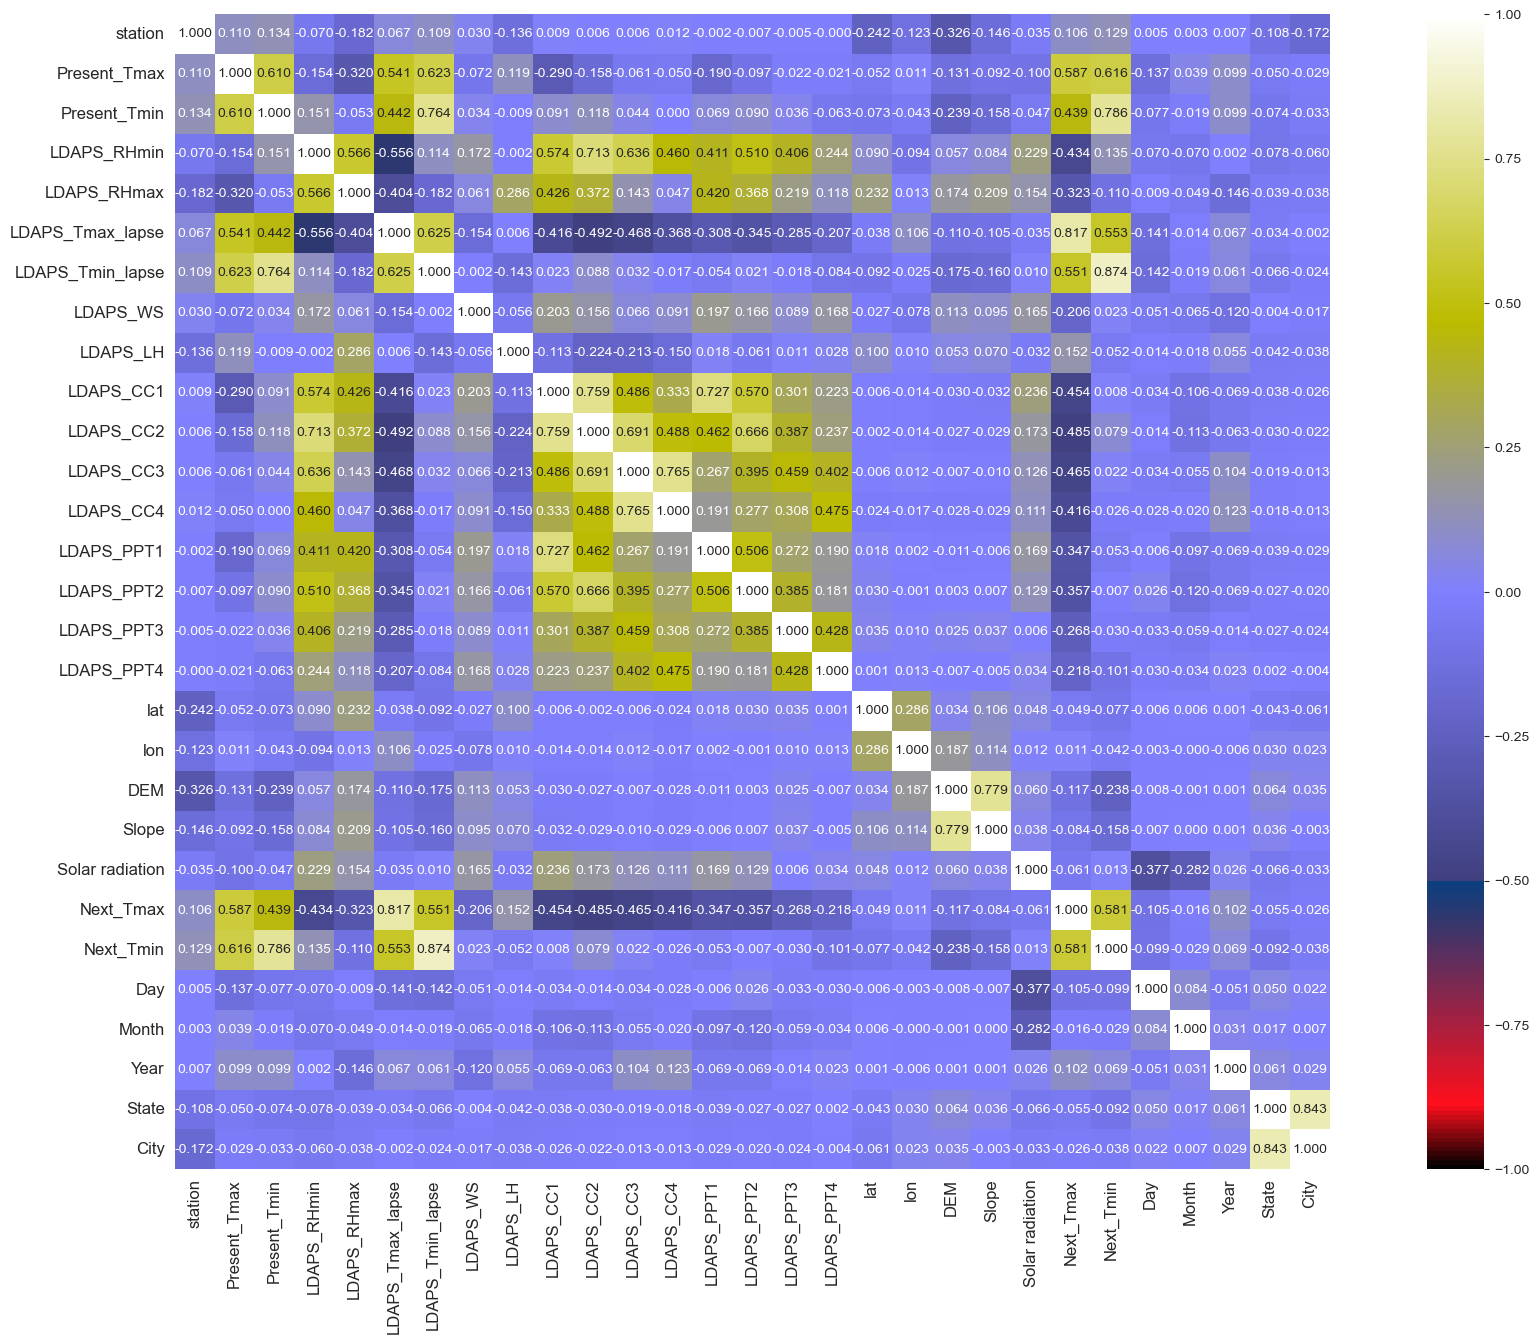

In [53]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),vmin=-1,vmax = 1, annot = True, square = True, fmt='0.3f',
           annot_kws={'size':10},cmap='gist_stern')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

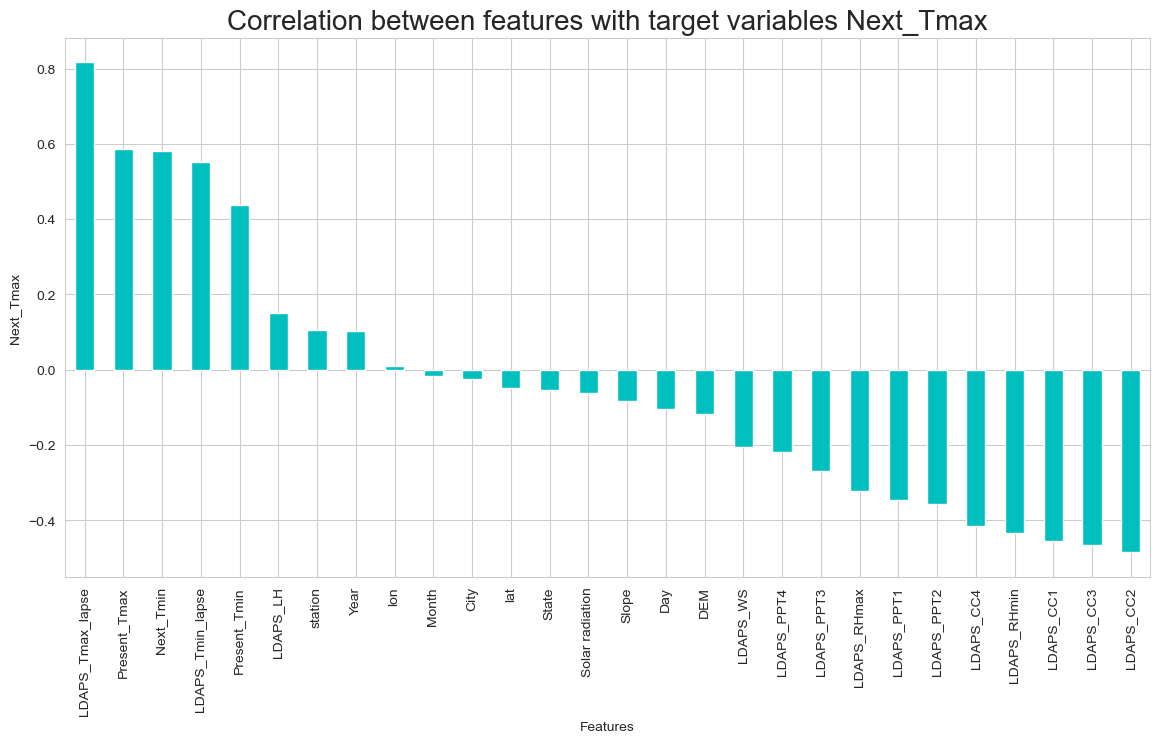

In [54]:
plt.figure(figsize=(14,7))
data.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Next_Tmax',fontsize = 10)
plt.title('Correlation between features with target variables Next_Tmax', fontsize = 20)
plt.show()

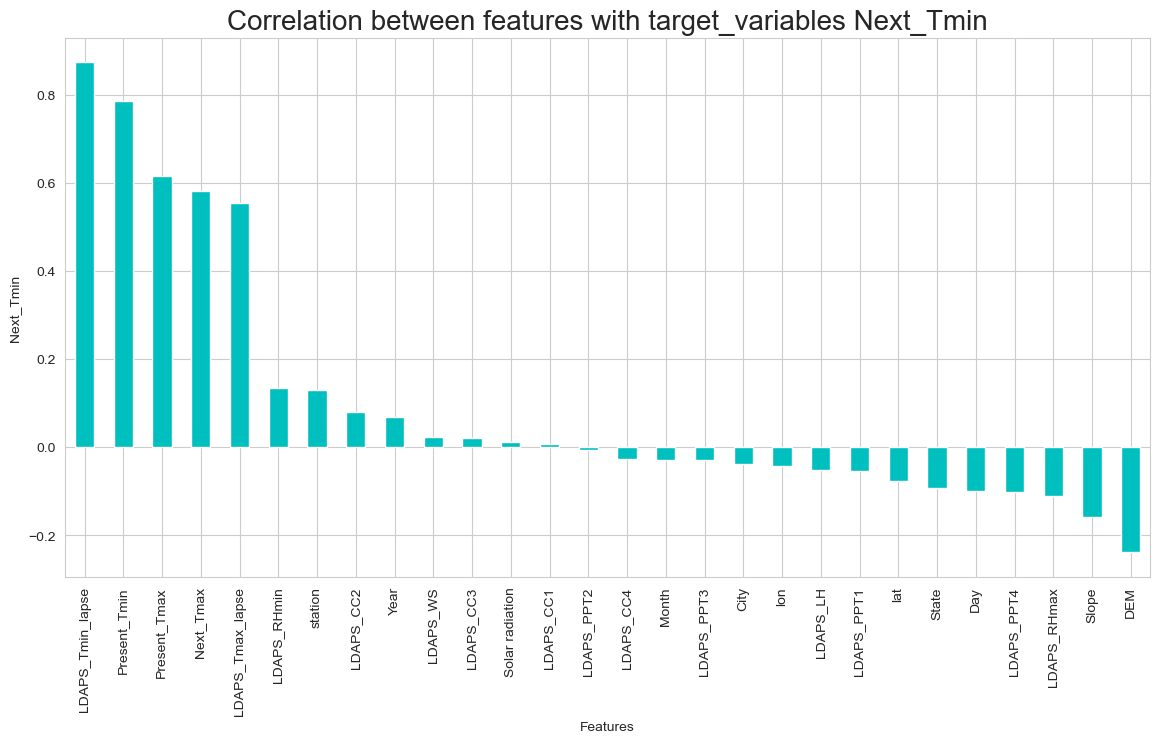

In [55]:
plt.figure(figsize=(14,7))
data.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Next_Tmin',fontsize = 10)
plt.title('Correlation between features with target_variables Next_Tmin', fontsize = 20)
plt.show()

# Machine Learning Model Building For Next_Tmax


In [56]:
# spliting data in target abd dependent features

x = data.drop(['Next_Tmax'], axis = 1)
y = data['Next_Tmax']

# Standard Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# Checking Multicollinearity between features using variance_inflation_factor

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scale,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF          Features
0   1.353177           station
1   2.849784      Present_Tmax
2   3.383435      Present_Tmin
3   6.077961       LDAPS_RHmin
4   2.614712       LDAPS_RHmax
5   6.650091  LDAPS_Tmax_lapse
6   8.235731  LDAPS_Tmin_lapse
7   1.225322          LDAPS_WS
8   1.523389          LDAPS_LH
9   4.874106         LDAPS_CC1
10  5.533647         LDAPS_CC2
11  4.567857         LDAPS_CC3
12  2.792518         LDAPS_CC4
13  2.601274        LDAPS_PPT1
14  2.174592        LDAPS_PPT2
15  1.592341        LDAPS_PPT3
16  1.601009        LDAPS_PPT4
17  1.310633               lat
18  1.225664               lon
19  3.382228               DEM
20  2.876560             Slope
21  1.487825   Solar radiation
22  5.674284         Next_Tmin
23  1.259835               Day
24  1.122200             Month
25  1.136580              Year
26  3.615665             State
27  3.641816              City

#### Independent Features VIF is within permissible limit of 10.

# PCA


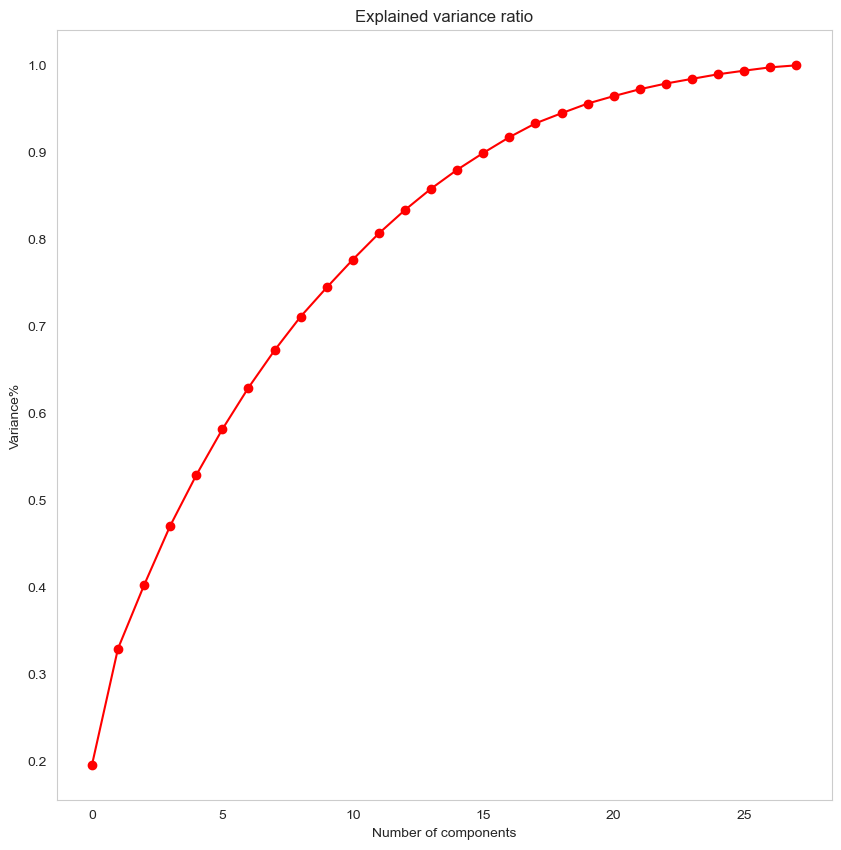

In [59]:
from sklearn.decomposition import PCA
pca = PCA()
# plot the graph to find the principal components
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of components')
plt.ylabel('Variance%')
plt.title("Explained variance ratio")
plt.grid()

In [60]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(x_scale)

In [61]:
pri_x = pd.DataFrame(x_new, columns=np.arange(15))

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [63]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,test_size=.33, random_state=42)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector : (4515,)
Test feature matrix size : (2224, 15)
Test target vector size : (2224,)


# Finding Best random rate


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRs=0
for i in range (1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x_scale,y,test_size = .33, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    R2 = r2_score(y_test, y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score, 'on Random_state',maxRS)

Best accuracy is 0.8039911601666626 on Random_state 833


# Linear Regression Base Model

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.3,random_state=91)
lrr = LinearRegression()
lrr.fit(x_train,y_train)
lrr.score(x_train,y_train)
y_pred = lrr.predict(x_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n', y_test)

Predicted result price:
 [32.47191251 33.56063714 33.93376527 ... 29.89754409 32.01127512
 28.52170494]


actual price
 2028    32.1
1287    33.2
4007    34.0
4516    26.0
1504    29.8
        ... 
2593    28.1
1540    28.2
5269    31.5
7196    31.6
3132    28.4
Name: Next_Tmax, Length: 2022, dtype: float64


## Cross validation

In [66]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, x,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LinearRegression()
CVS Score :  [0.73990683 0.66841606 0.69983529 0.75354951 0.55905136]
Mean CVS Score :  0.684151810778109
Std Deviation :  0.06938064467423374


# Applying Other ML Models

In [67]:
models =[
    SVR(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Errors of ',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Mean absolute error :' + '\033[0m\n',mean_absolute_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',mean_squared_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score' + '\033[0m')
    print(r2_score(y_test,y_pred))
    print('******************************************************************************************************************')

Errors of  SVR() is


Mean absolute error :
 0.7456537059703857


Confusion Matrix 
 1.0587301311253445


Classification Report 
 1.028946126444599


R2 Score
0.8781752519650116
******************************************************************************************************************
Errors of  DecisionTreeRegressor() is


Mean absolute error :
 1.02675568743818


Confusion Matrix 
 2.0461671612265087


Classification Report 
 1.4304429947490074


R2 Score
0.7645539769526261
******************************************************************************************************************
Errors of  KNeighborsRegressor() is


Mean absolute error :
 0.8428783382789317


Confusion Matrix 
 1.2102458951533135


Classification Report 
 1.100111764846333


R2 Score
0.8607408092931889
******************************************************************************************************************
Errors of  RandomForestRegressor() is


Mean absolute error :
 0.7014000989119683


Conf

# Cross Validation


In [68]:
from sklearn.model_selection import cross_val_score
model =[
    SVR(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('******************************************************************************************************************')



Cross Validation Score SVR() is
Score [ 0.07220676 -0.17448236  0.05054501 -0.14029289  0.02963595]
Mean Score : -0.032477505360043325
Std Deviation 0.10343998205391709


******************************************************************************************************************


Cross Validation Score DecisionTreeRegressor() is
Score [0.44775602 0.43810467 0.35882315 0.51450979 0.34079676]
Mean Score : 0.419998078910879
Std Deviation 0.06331830314943286


******************************************************************************************************************


Cross Validation Score KNeighborsRegressor() is
Score [0.5145287  0.41308281 0.48898742 0.72429111 0.48438276]
Mean Score : 0.5250545595269058
Std Deviation 0.10516530233385953


******************************************************************************************************************


Cross Validation Score RandomForestRegressor() is
Score [0.74344697 0.66754629 0.68096568 0.7282184  0.6194273 ]
Mean

# Hyper Parameter Tunning Using GridSearchCV


In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param = [{'n_estimators':[200,400],
         'gamma':np.arange(0,0.1),
         'booster':['gbtree','dart'],
          'max_depth':[4,6],
          'eta':[0.01,0.1]}]

In [71]:
gc = GridSearchCV(XGBRegressor(),param,verbose=10)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 1/16] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.781 total time=   0.2s
[CV 2/5; 1/16] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200
[CV 2/5; 1/16] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.755 total time=   0.2s
[CV 3/5; 1/16] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200
[CV 3/5; 1/16] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.768 total time=   0.2s
[CV 4/5; 1/16] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200
[CV 4/5; 1/16] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.781 total time=   0.2s
[CV 5/5; 1/16] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200
[CV 5/5; 1/16] END boos

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid=[{'booster': ['gbtree', 'dart'], 'eta': [0.01, 0.1],
                          'gamma': array([0.]), 'max_depth': [4, 6],
                          'n_estimators': [200, 400]}],
             verbose=10)

In [72]:
gc.best_params_

{'booster': 'dart',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 6,
 'n_estimators': 400}

# Final Model Prediction

In [73]:
final = XGBRegressor(n_estimators =400,gamma= 0.0, max_depth =6 ,booster = 'dart',
                             eta  =0.1 )
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Score',r2_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Mean absolute error : 0.582746302739567
Mean Squared error : 0.5892918425069765
Root Mean Squared error 0.7676534651175467
R2_Score 0.9321920401413538


True Value Vs Predicted Value Plot :


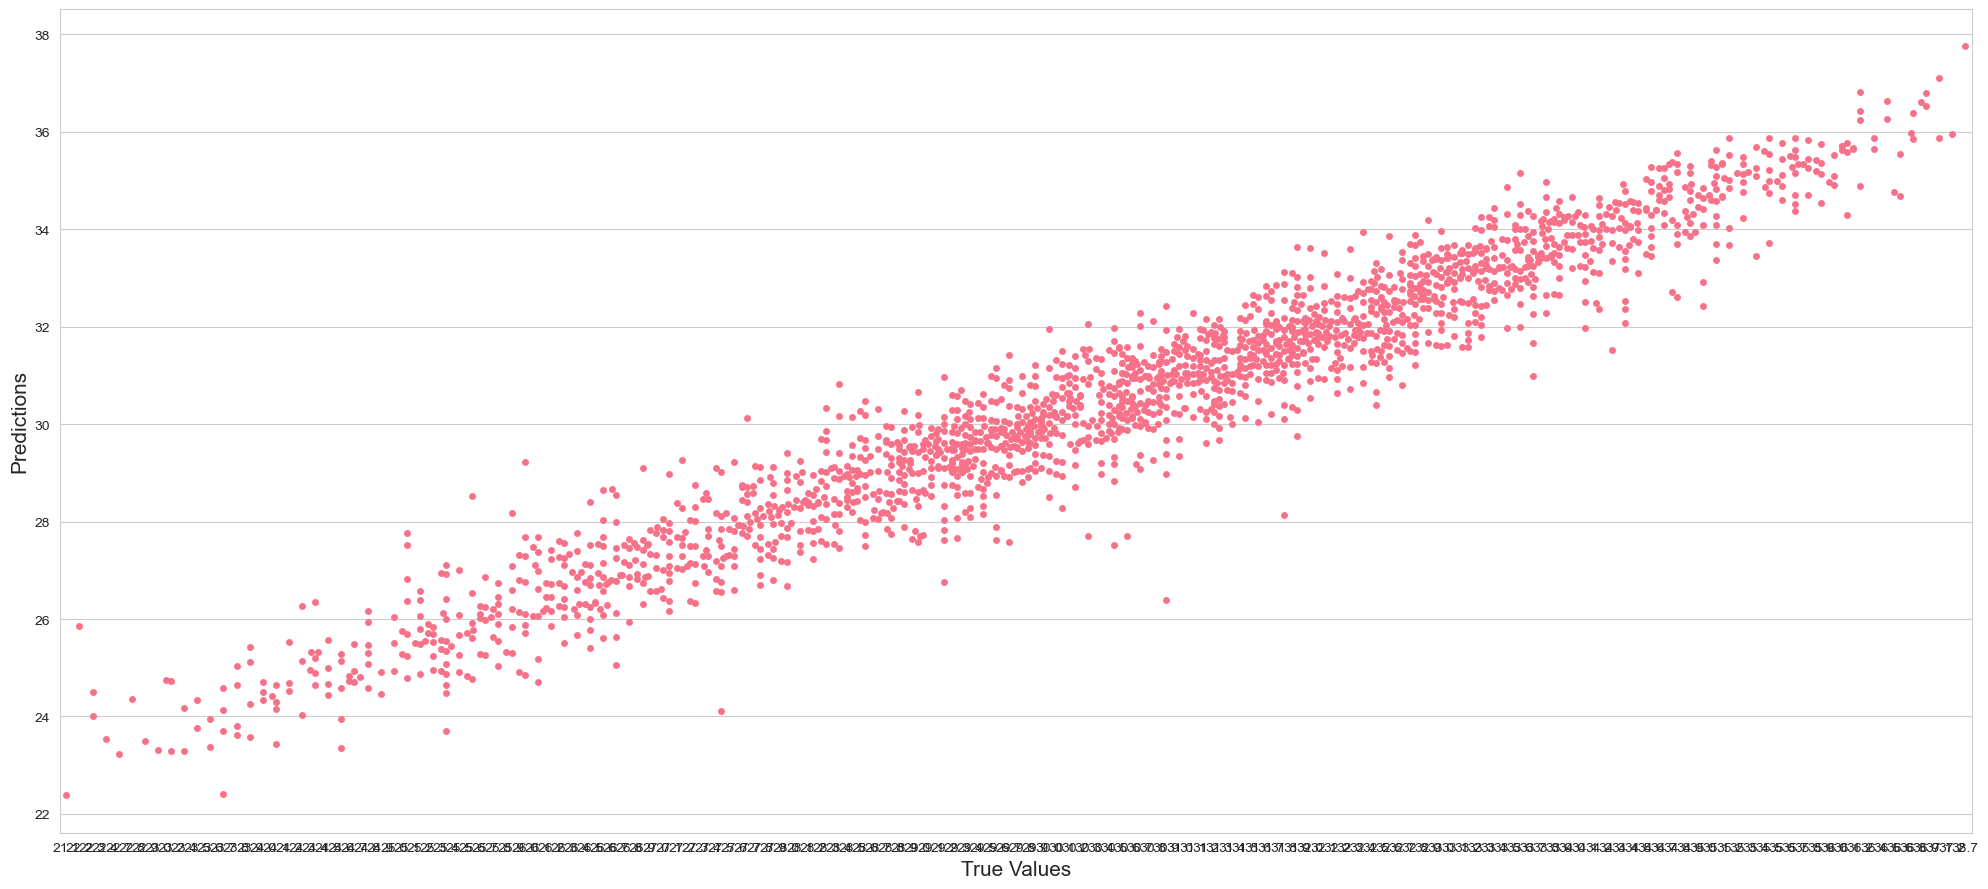

In [74]:
plt.figure(figsize=(20,9))
y_pred = final.predict(x_test)
sns.swarmplot(x=y_test.round(2),y=y_pred)
print("True Value Vs Predicted Value Plot :")
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.tight_layout()

# Predict the final model


In [75]:
prediction = final.predict(x_test)

In [76]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

Predicted Values  Actual Values
0         32.832283           32.1
1         33.512085           33.2
2         33.624485           34.0
3         24.921320           26.0
4         30.161757           29.8

# Saving the model


In [77]:
import joblib
joblib.dump(final,"Temprature_Next_Tmax")

['Temprature_Next_Tmax']

# Machine Learning Model Building For Next_Tmin

#### Standard Scaling

In [78]:
# spliting data in target abd dependent features
x = data.drop(['Next_Tmin'], axis = 1)
y = data['Next_Tmin']

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.33, random_state=42)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (4515, 28)
Training target vector : (4515,)
Test feature matrix size : (2224, 28)
Test target vector size : (2224,)


# Finding best random state


In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRs=0
for i in range (1,500):
    x_train,x_test,y_train,y_test= train_test_split(x_scale,y,test_size = .33, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    R2 = r2_score(y_test, y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score, 'on Random_state',maxRS)

Best accuracy is 0.8512433756352809 on Random_state 43


# Linear regression base model

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.3,random_state=91)
lrr = LinearRegression()
lrr.fit(x_train,y_train)
lrr.score(x_train,y_train)
y_pred = lrr.predict(x_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n', y_test)

Predicted result price:
 [23.91557911 24.00833245 25.1966587  ... 24.76580066 24.77337737
 19.51760674]


actual price
 2028    24.3
1287    24.4
4007    24.8
4516    18.0
1504    22.8
        ... 
2593    16.9
1540    18.7
5269    25.7
7196    24.0
3132    19.1
Name: Next_Tmin, Length: 2022, dtype: float64


# Cross validation score

In [83]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, x,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LinearRegression()
CVS Score :  [0.74000097 0.67138222 0.80006479 0.86835432 0.86487186]
Mean CVS Score :  0.788934832589822
Std Deviation :  0.07538024143109223


# Applying Other ML Regression Models

In [84]:
models =[
    SVR(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Errors of ',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Mean absolute error :' + '\033[0m\n',mean_absolute_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',mean_squared_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score' + '\033[0m')
    print(r2_score(y_test,y_pred))
    print('******************************************************************************************************************')

Errors of  SVR() is


Mean absolute error :
 0.5330634449299735


Confusion Matrix 
 0.4838337820603001


Classification Report 
 0.6955816142339446


R2 Score
0.9125643996726958
******************************************************************************************************************
Errors of  DecisionTreeRegressor() is


Mean absolute error :
 0.834272997032641


Confusion Matrix 
 1.2691543026706231


Classification Report 
 1.1265674869578932


R2 Score
0.7706458860944997
******************************************************************************************************************
Errors of  KNeighborsRegressor() is


Mean absolute error :
 0.7017507418397626


Confusion Matrix 
 0.8152911968348171


Classification Report 
 0.9029347688702751


R2 Score
0.8526653617834103
******************************************************************************************************************
Errors of  RandomForestRegressor() is


Mean absolute error :
 0.5737032640949556


C

# Cross Validation


In [85]:
from sklearn.model_selection import cross_val_score
model =[
    SVR(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('******************************************************************************************************************')



Cross Validation Score SVR() is
Score [-0.07162896 -0.49865719 -0.06358731 -0.01783028  0.02764187]
Mean Score : -0.12481237226223654
Std Deviation 0.19027579575510037


******************************************************************************************************************


Cross Validation Score DecisionTreeRegressor() is
Score [0.47582742 0.47420577 0.605243   0.76348045 0.66391809]
Mean Score : 0.5965349465541662
Std Deviation 0.11137491087306763


******************************************************************************************************************


Cross Validation Score KNeighborsRegressor() is
Score [0.40727164 0.39151573 0.5261008  0.74980897 0.76379483]
Mean Score : 0.5676983965807605
Std Deviation 0.16132297506139176


******************************************************************************************************************


Cross Validation Score RandomForestRegressor() is
Score [0.72509534 0.69483681 0.8085084  0.87542922 0.85656152]
Mean

# Hyper-Parameter Tunning Using GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param = [{'n_estimators':[50,75,100],
         'gamma':np.arange(0,0.1),
         'booster':['gbtree','dart'],
          'max_depth':[4,6],
          'eta':[0.01,0.1]}]

In [88]:
gc = GridSearchCV(XGBRegressor(),param,verbose=10)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 1/24] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.493 total time=   0.0s
[CV 2/5; 1/24] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 1/24] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.492 total time=   0.0s
[CV 3/5; 1/24] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 1/24] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.503 total time=   0.0s
[CV 4/5; 1/24] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 1/24] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.503 total time=   0.0s
[CV 5/5; 1/24] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 5/5; 1/24] END booster=gbtr

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid=[{'booster': ['gbtree', 'dart'], 'eta': [0.01, 0.1],
                          'gamma': array([0.]), 'max_depth': [4, 6],
                          'n_estimators': [50, 75, 100]}],
             verbose=10)

In [89]:
gc.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 6,
 'n_estimators': 100}

# Final model Prediction

In [90]:
final = XGBRegressor(n_estimators =100,gamma= 0.0, max_depth =6 ,booster = 'gbtree',
                             eta  =0.1 )
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Score',r2_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Mean absolute error : 0.4886244584261841
Mean Squared error : 0.39652373324374707
Root Mean Squared error 0.6297013047816775
R2_Score 0.9283425590653157


True Value Vs Predicted Value Plot :


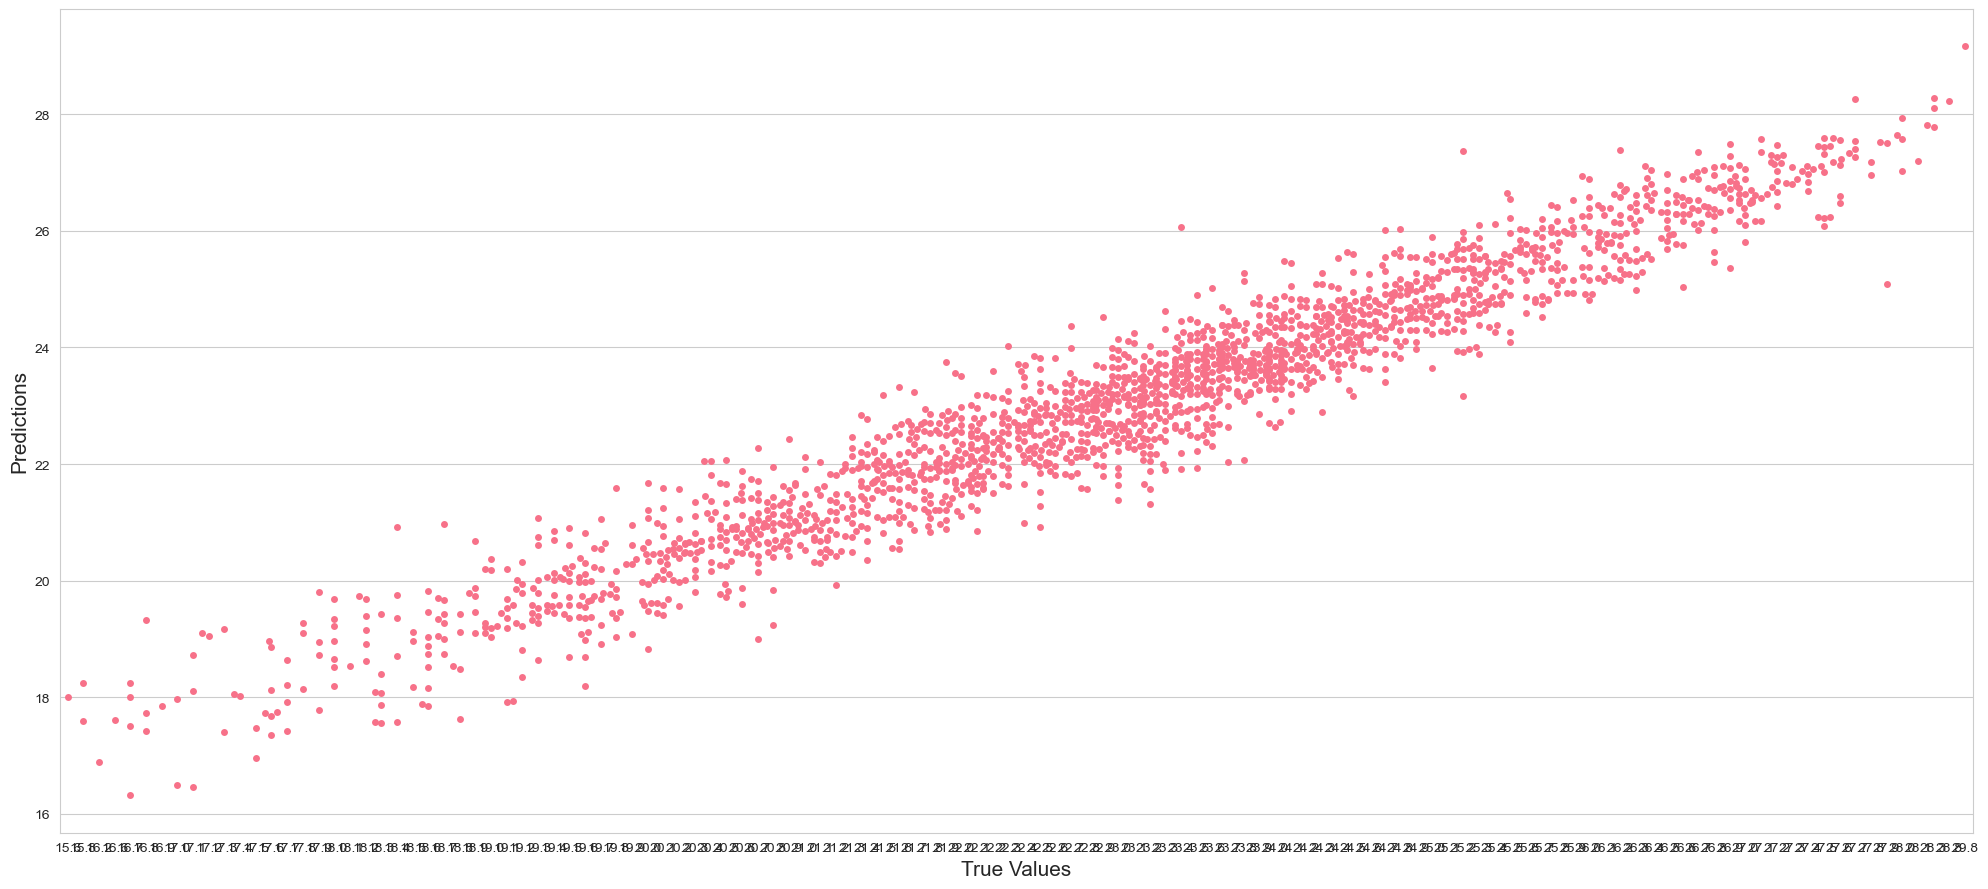

In [91]:
plt.figure(figsize=(20,9))
y_pred = final.predict(x_test)
sns.swarmplot(x=y_test.round(2),y=y_pred)
print("True Value Vs Predicted Value Plot :")
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.tight_layout()

# Predicted the final model


In [92]:
prediction = final.predict(x_test)

In [93]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

Predicted Values  Actual Values
0         24.557556           24.3
1         24.820107           24.4
2         25.612646           24.8
3         18.188181           18.0
4         22.529758           22.8

# Saving the model

In [94]:
import joblib
joblib.dump(final,"Temprature_Next_Tmin")

['Temprature_Next_Tmin']